In [195]:
#Import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as figure
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn import preprocessing
import math
import warnings

warnings.filterwarnings("ignore")

In [196]:
#Reading the training data file using pandas to transfer the file into pandas dataframe to make it easier to view the data
training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

# Studying the data

In [197]:
#Viewing the shape of the data using .head function as an inital introduction to our data
training_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [198]:
testing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [199]:
#Viewing the data but this time using .tail function to see the bottom rows seeing how many indexes we have in our data
training_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [200]:
testing_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


- Viewing the information of the data columns seperatly showing Non-Null count and data type 
- This can be used later on to transfer data from object to numeric
- Here you can also see how many entries there are  which is descriped as Range Index 
- Thus getting to know the shape of the data which is (1460,81)

In [201]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [202]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Checking Null values and cleaning the data
- Checking for null values in the data using isnull().sum function which sums up all the null values from the data.
- To decide to either drop columns or drop rows.

In [203]:
obj = training_data.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

Id , 0
MSSubClass , 0
MSZoning , 0
LotFrontage , 259
LotArea , 0
Street , 0
Alley , 1369
LotShape , 0
LandContour , 0
Utilities , 0
LotConfig , 0
LandSlope , 0
Neighborhood , 0
Condition1 , 0
Condition2 , 0
BldgType , 0
HouseStyle , 0
OverallQual , 0
OverallCond , 0
YearBuilt , 0
YearRemodAdd , 0
RoofStyle , 0
RoofMatl , 0
Exterior1st , 0
Exterior2nd , 0
MasVnrType , 8
MasVnrArea , 8
ExterQual , 0
ExterCond , 0
Foundation , 0
BsmtQual , 37
BsmtCond , 37
BsmtExposure , 38
BsmtFinType1 , 37
BsmtFinSF1 , 0
BsmtFinType2 , 38
BsmtFinSF2 , 0
BsmtUnfSF , 0
TotalBsmtSF , 0
Heating , 0
HeatingQC , 0
CentralAir , 0
Electrical , 1
1stFlrSF , 0
2ndFlrSF , 0
LowQualFinSF , 0
GrLivArea , 0
BsmtFullBath , 0
BsmtHalfBath , 0
FullBath , 0
HalfBath , 0
BedroomAbvGr , 0
KitchenAbvGr , 0
KitchenQual , 0
TotRmsAbvGrd , 0
Functional , 0
Fireplaces , 0
FireplaceQu , 690
GarageType , 81
GarageYrBlt , 81
GarageFinish , 81
GarageCars , 0
GarageArea , 0
GarageQual , 81
GarageCond , 81
PavedDrive , 0
WoodDeckSF ,

In [204]:
obj = testing_data.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

Id , 0
MSSubClass , 0
MSZoning , 4
LotFrontage , 227
LotArea , 0
Street , 0
Alley , 1352
LotShape , 0
LandContour , 0
Utilities , 2
LotConfig , 0
LandSlope , 0
Neighborhood , 0
Condition1 , 0
Condition2 , 0
BldgType , 0
HouseStyle , 0
OverallQual , 0
OverallCond , 0
YearBuilt , 0
YearRemodAdd , 0
RoofStyle , 0
RoofMatl , 0
Exterior1st , 1
Exterior2nd , 1
MasVnrType , 16
MasVnrArea , 15
ExterQual , 0
ExterCond , 0
Foundation , 0
BsmtQual , 44
BsmtCond , 45
BsmtExposure , 44
BsmtFinType1 , 42
BsmtFinSF1 , 1
BsmtFinType2 , 42
BsmtFinSF2 , 1
BsmtUnfSF , 1
TotalBsmtSF , 1
Heating , 0
HeatingQC , 0
CentralAir , 0
Electrical , 0
1stFlrSF , 0
2ndFlrSF , 0
LowQualFinSF , 0
GrLivArea , 0
BsmtFullBath , 2
BsmtHalfBath , 2
FullBath , 0
HalfBath , 0
BedroomAbvGr , 0
KitchenAbvGr , 0
KitchenQual , 1
TotRmsAbvGrd , 0
Functional , 2
Fireplaces , 0
FireplaceQu , 730
GarageType , 76
GarageYrBlt , 78
GarageFinish , 78
GarageCars , 1
GarageArea , 1
GarageQual , 78
GarageCond , 78
PavedDrive , 0
WoodDeckSF

- After seeing the null values of most of the columns we can see that some columns have more than 50% null values.
- In this case this will affect our data if we tried to apply the functio dropna.
- And we want to keep as much as we can of the data to train our model for the best results.
- One of the sloutions that we will apply here is to drop the data that has more than 40% null values.
- Just in case we chose 40%.
- And the data that has below 50% null values we will try to replace the null values with either,
 - the mean or a specific value.
- now both data are close in terms of missing value so we are going to apply the same steps,
 - on both dataframes but testing doesn't have target_variable so we are going,
   - ignore that part.

In [205]:
for i in training_data:
    if training_data[i].isnull().sum() >= (1460*0.4):
        training_data.drop([i],axis=1,inplace=True)

In [206]:
for i in testing_data:
    if testing_data[i].isnull().sum() >= (1460*0.4):
        testing_data.drop([i],axis=1,inplace=True)

In [207]:
obj = training_data.nunique()
for key,value in obj.iteritems():
    print(key,",",value)


Id , 1460
MSSubClass , 15
MSZoning , 5
LotFrontage , 110
LotArea , 1073
Street , 2
LotShape , 4
LandContour , 4
Utilities , 2
LotConfig , 5
LandSlope , 3
Neighborhood , 25
Condition1 , 9
Condition2 , 8
BldgType , 5
HouseStyle , 8
OverallQual , 10
OverallCond , 9
YearBuilt , 112
YearRemodAdd , 61
RoofStyle , 6
RoofMatl , 8
Exterior1st , 15
Exterior2nd , 16
MasVnrType , 4
MasVnrArea , 327
ExterQual , 4
ExterCond , 5
Foundation , 6
BsmtQual , 4
BsmtCond , 4
BsmtExposure , 4
BsmtFinType1 , 6
BsmtFinSF1 , 637
BsmtFinType2 , 6
BsmtFinSF2 , 144
BsmtUnfSF , 780
TotalBsmtSF , 721
Heating , 6
HeatingQC , 5
CentralAir , 2
Electrical , 5
1stFlrSF , 753
2ndFlrSF , 417
LowQualFinSF , 24
GrLivArea , 861
BsmtFullBath , 4
BsmtHalfBath , 3
FullBath , 4
HalfBath , 3
BedroomAbvGr , 8
KitchenAbvGr , 4
KitchenQual , 4
TotRmsAbvGrd , 12
Functional , 7
Fireplaces , 4
GarageType , 6
GarageYrBlt , 97
GarageFinish , 3
GarageCars , 5
GarageArea , 441
GarageQual , 5
GarageCond , 5
PavedDrive , 3
WoodDeckSF , 274
O

- We know that our data is not large enough for us to drop any row
- In fact dropping any row might affect our accuracy
- In this case we will fill the data using mode method for Object data and mean method
- For Numeric Data
- We Will build one function that has two statements each to fill
- The two types of data we have [Obj, Numeric]


In [208]:
def fill_null_values(
            dataframe):
    for i in dataframe:
        if dataframe[i].isnull().sum()>=1:
            if(dataframe[i].dtype == np.float64 or dataframe[i].dtype == np.int64):
                dataframe[i].fillna((dataframe[i].mean()),inplace=True)
            else:
                dataframe[i].fillna(dataframe[i].mode()[0],inplace=True)
    return dataframe



In [209]:
#Now we will call the function to fill al the null values of the 
training_data=fill_null_values(training_data)

testing_data=fill_null_values(testing_data)

- Let's take a quick look at our target variable (SalesPrice).
- Using seaborn library we'll draw a distribution plot to view,
- The shape of our target variable.

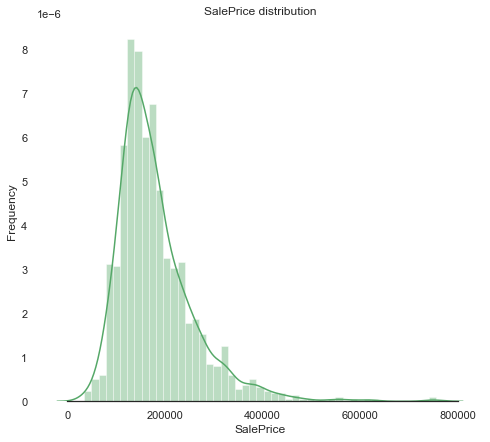

In [210]:
sns.set_style("white")
sns.set_color_codes(palette = 'deep')
f, ax = plt.subplots(figsize = (8, 7))
sns.distplot(training_data['SalePrice'], color = 'g');
ax.xaxis.grid(False)
ax.set(ylabel = "Frequency")
ax.set(title = "SalePrice distribution")
sns.despine(trim = True, left = True)
plt.show()

- What's the use of this information to us?
- Viewing the distripution of our target variable can help figure out,
- What can we do later in the feature engineering step.
- As we can see from the distripution there are some outliers that needs,
- to be removed and the distripution is normal but also can be adjusted,
- using feature engineering, one of the techniques that can be used,
- is log transofrmation to make the ditripution as close to normal.

In [211]:
#Checking the shape of the data making sure all good.
training_data.shape, testing_data.shape

((1460, 76), (1459, 75))

# Data Visualization
- In this part of the notebook we'll plot histograms of our numeric data.

In [212]:
def histo_plots(data,category): 
        fig, ax = plt.subplots(1, figsize=(10,10), sharey=True)
        fig.suptitle(category+" Histogram visualization", fontsize=14)
        sns.histplot(data[category], ax=ax)
        fig.show()

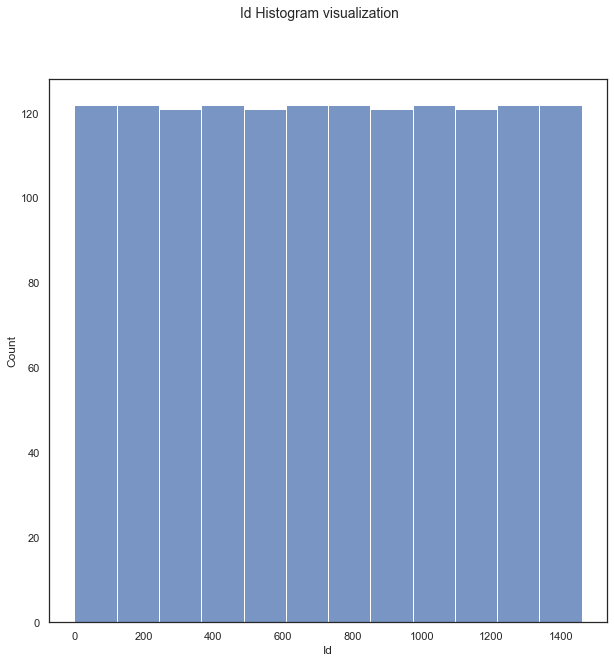

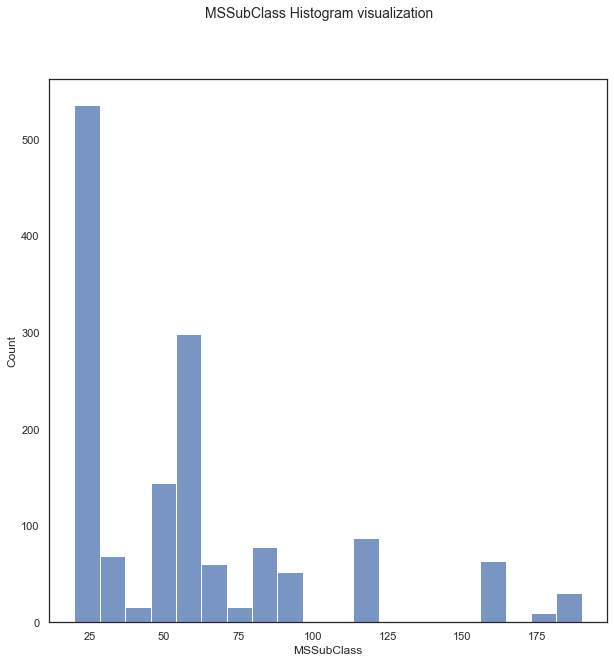

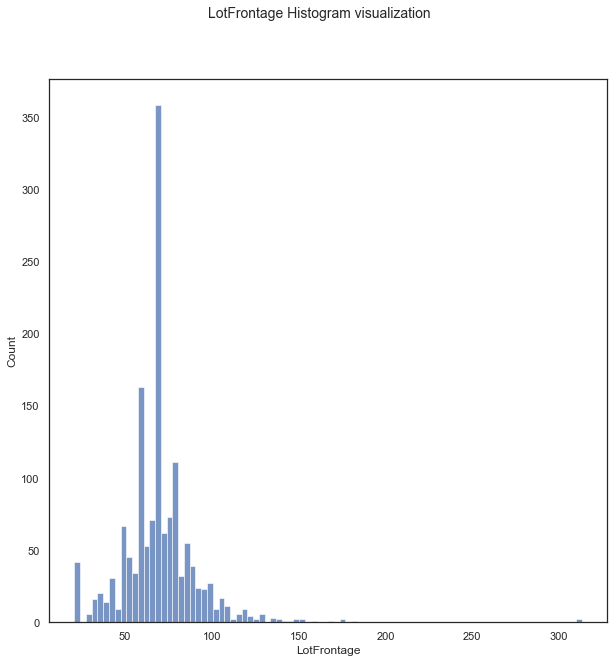

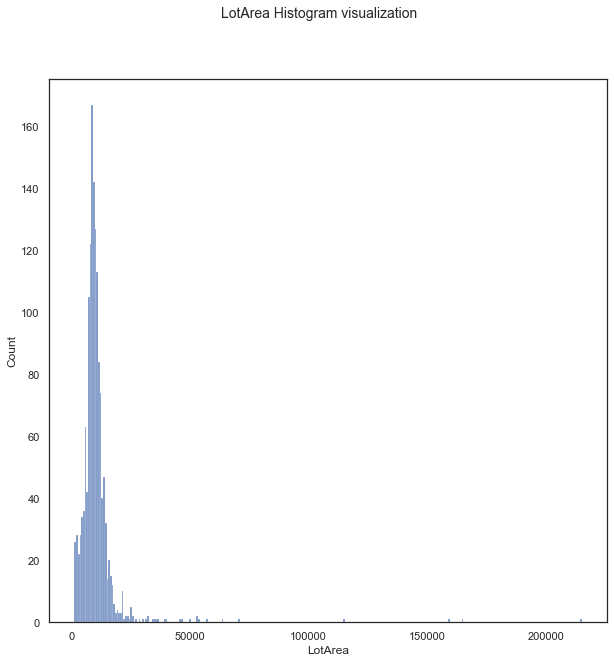

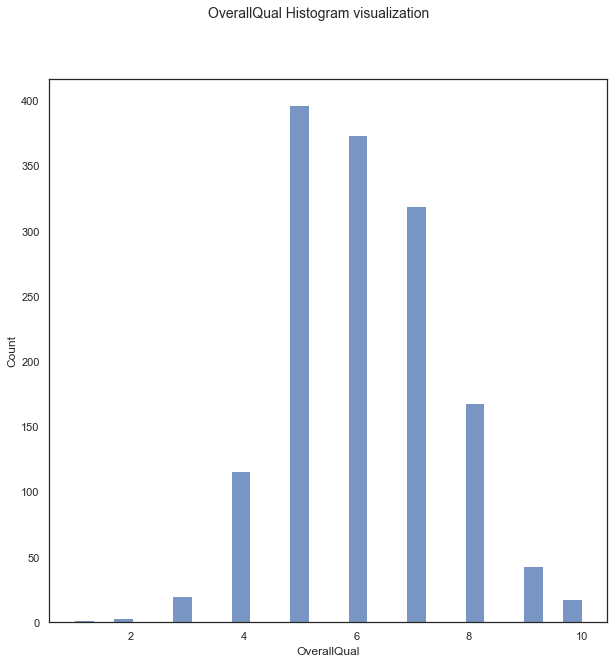

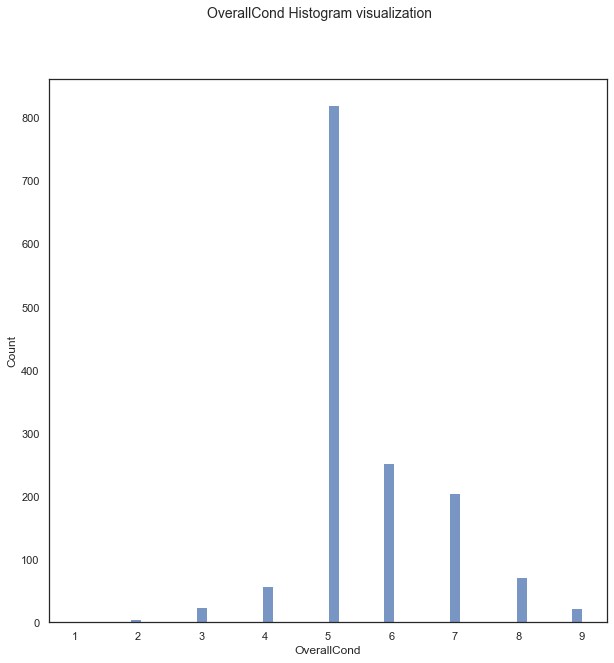

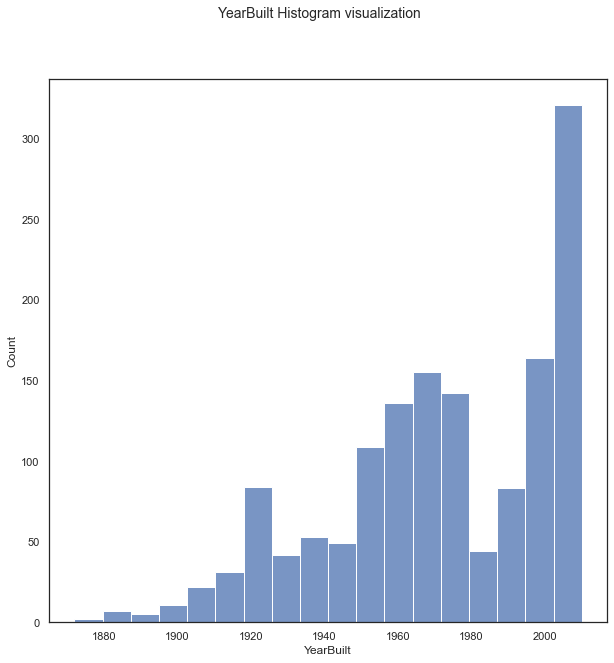

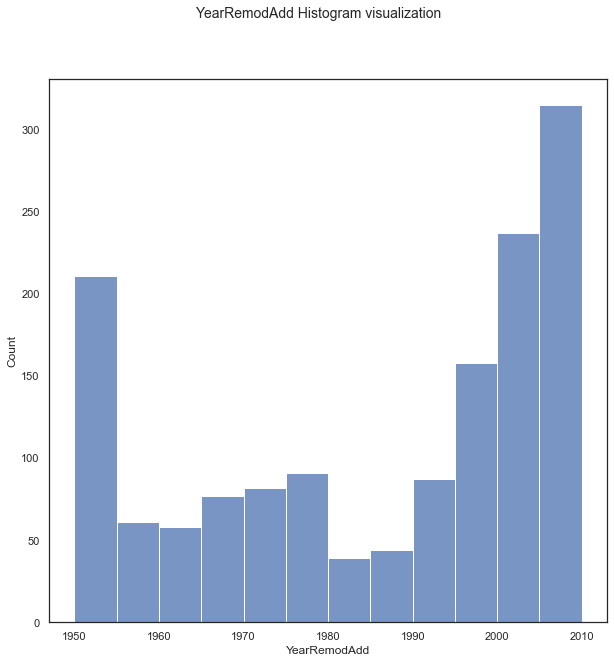

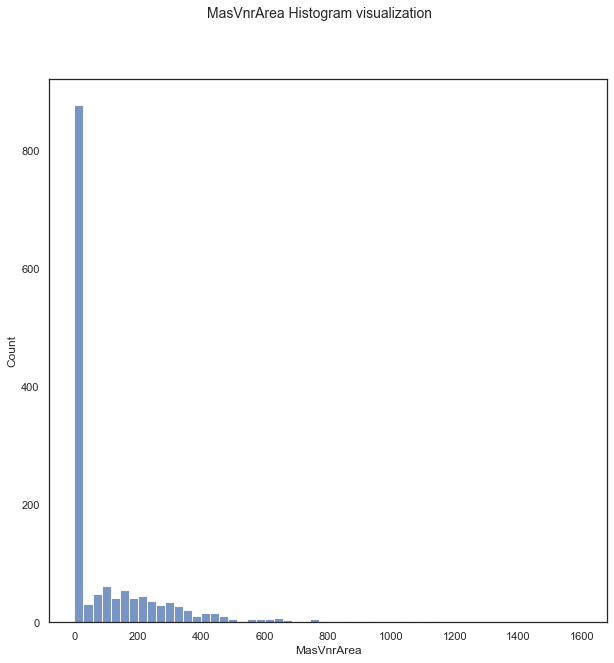

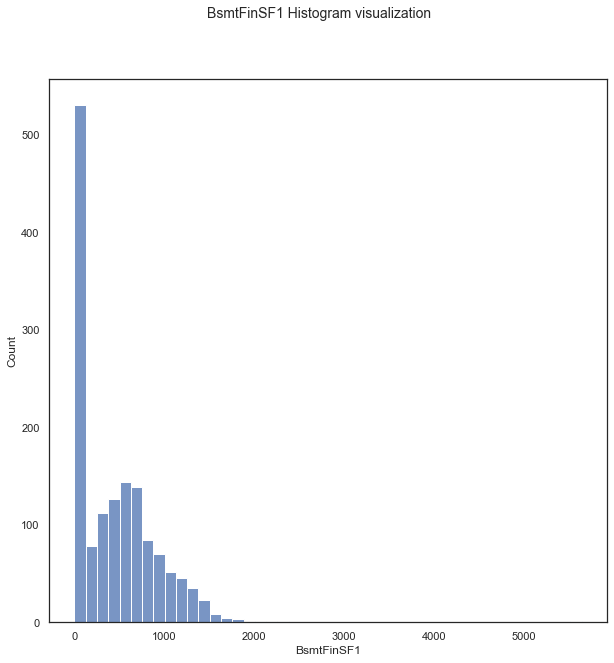

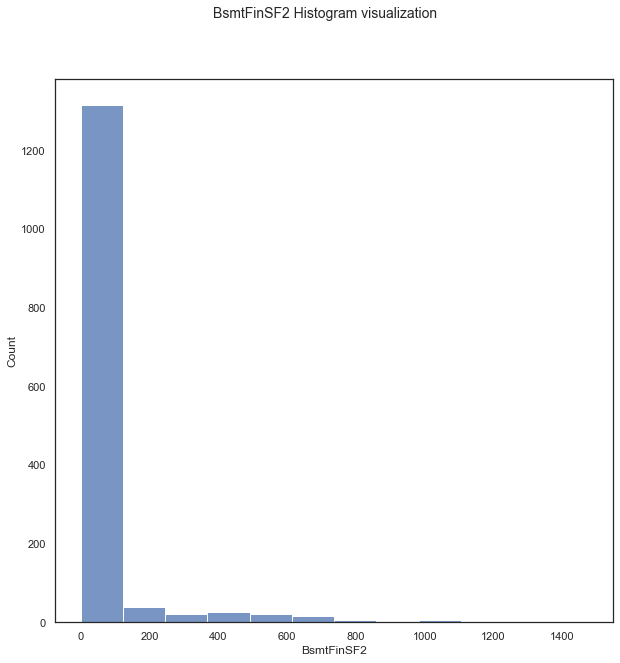

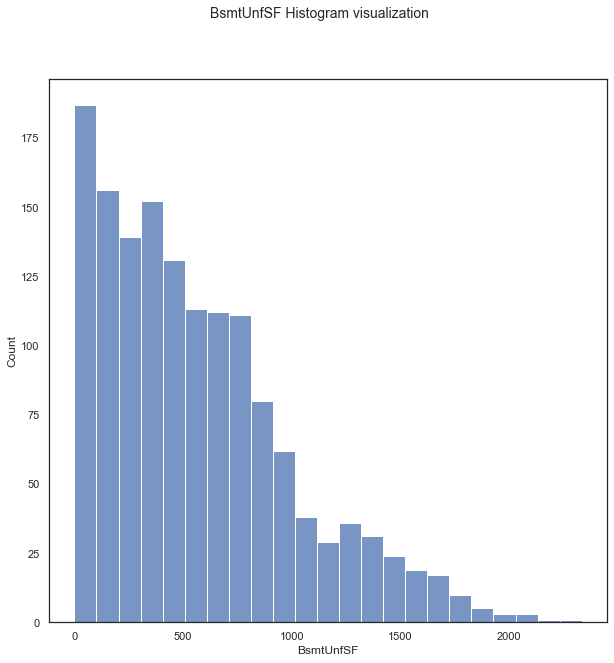

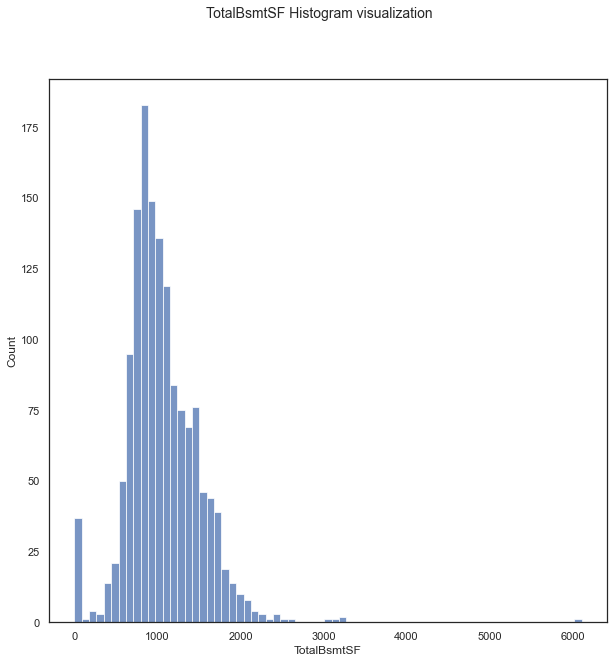

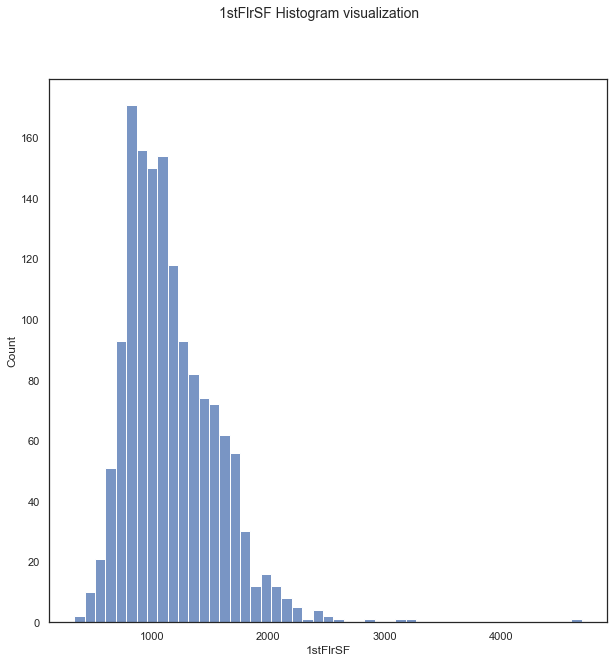

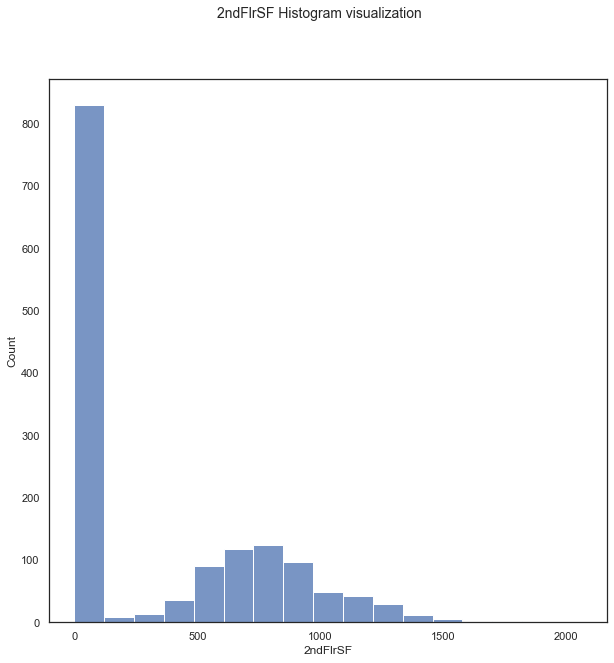

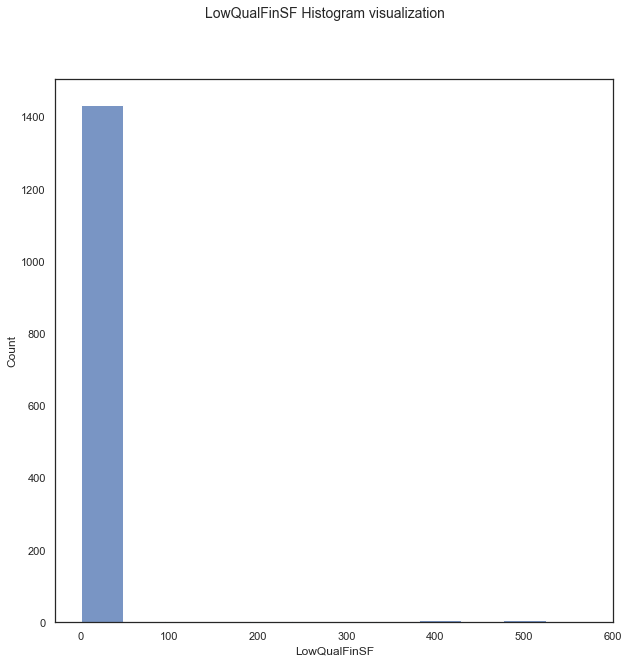

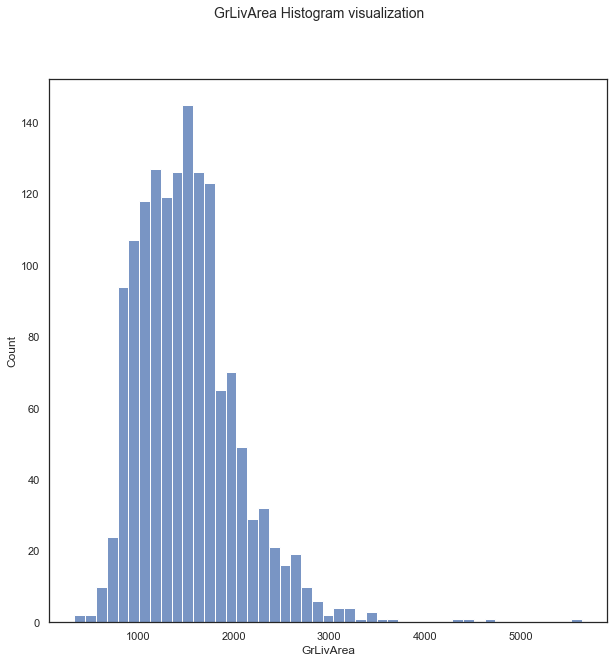

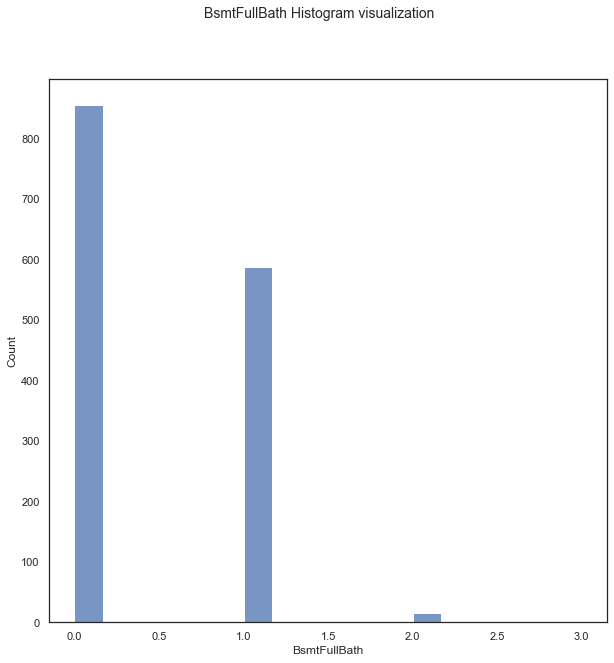

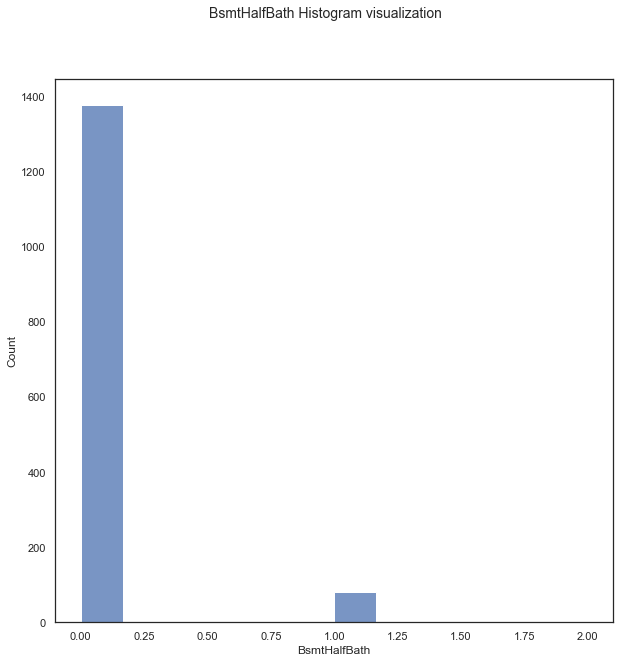

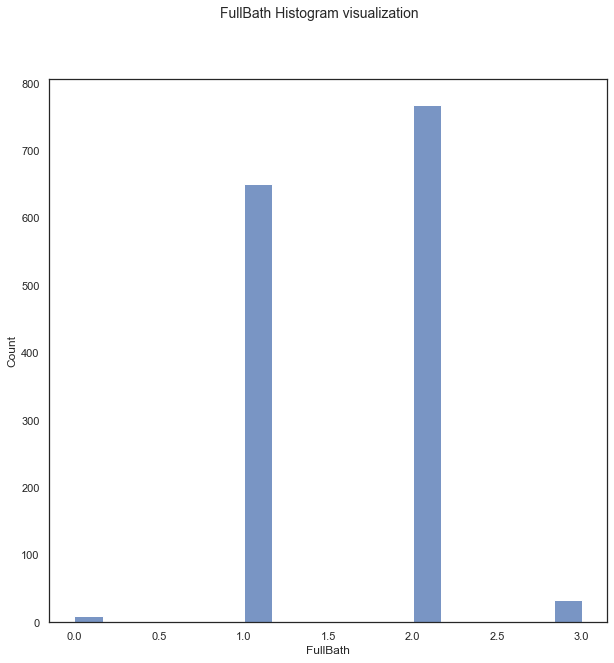

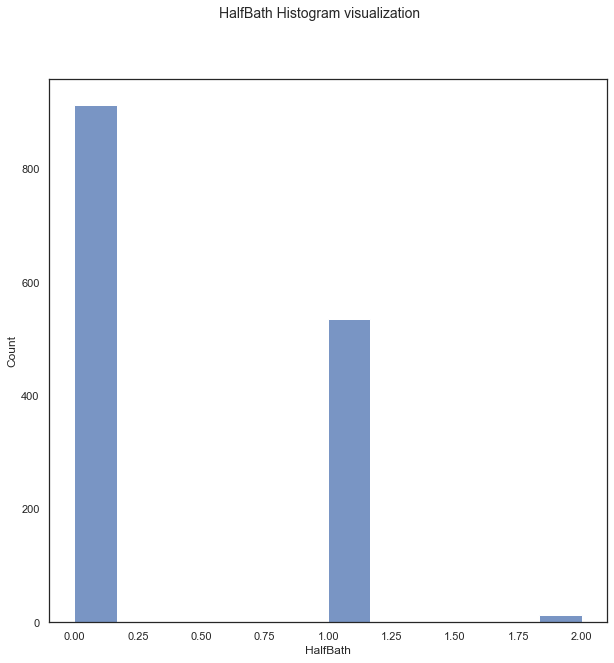

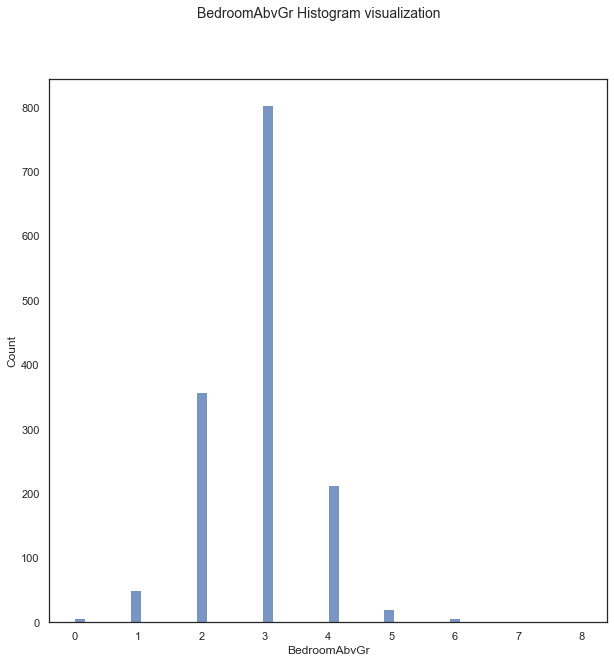

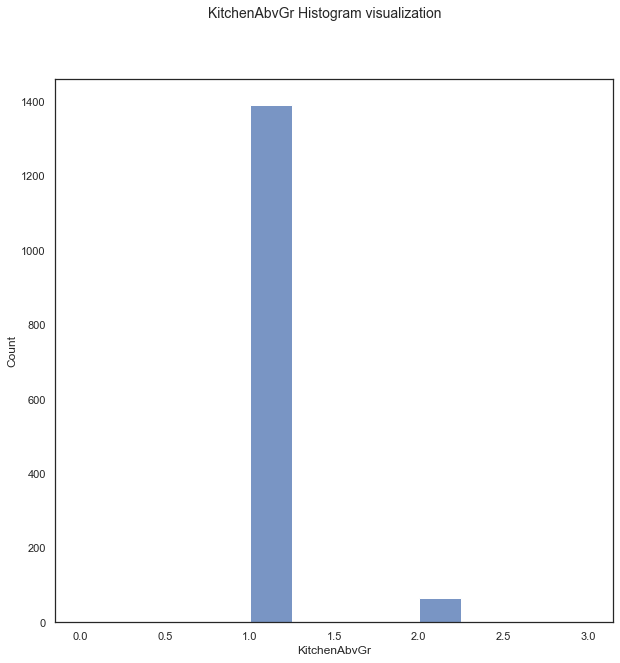

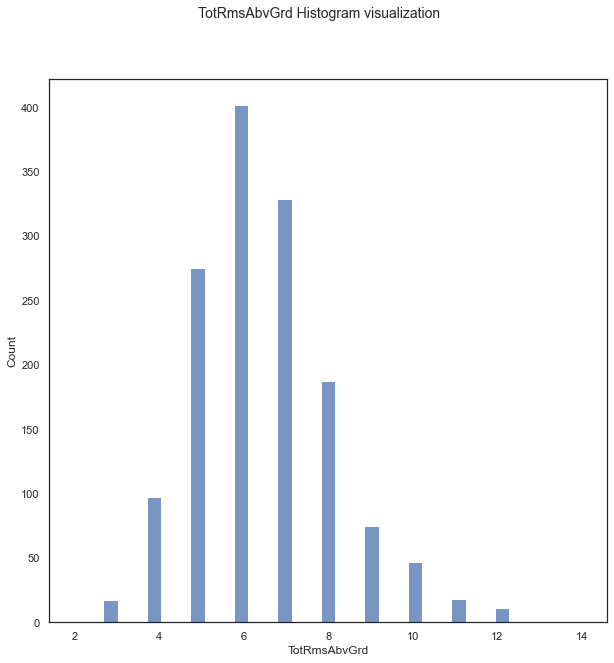

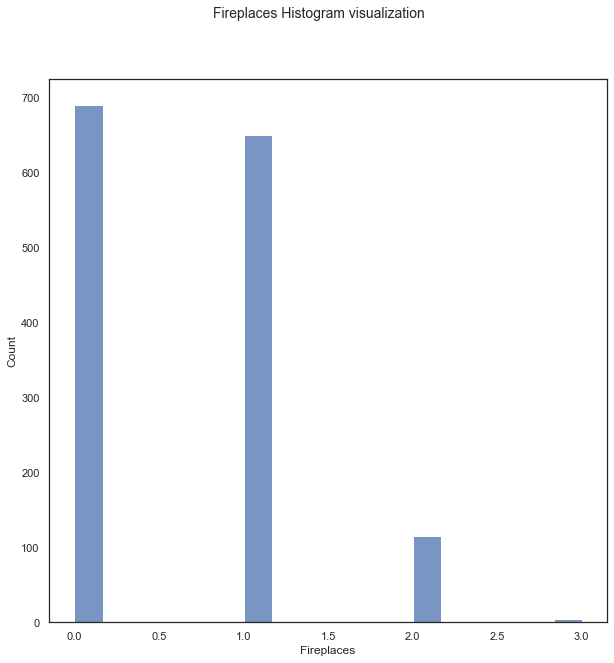

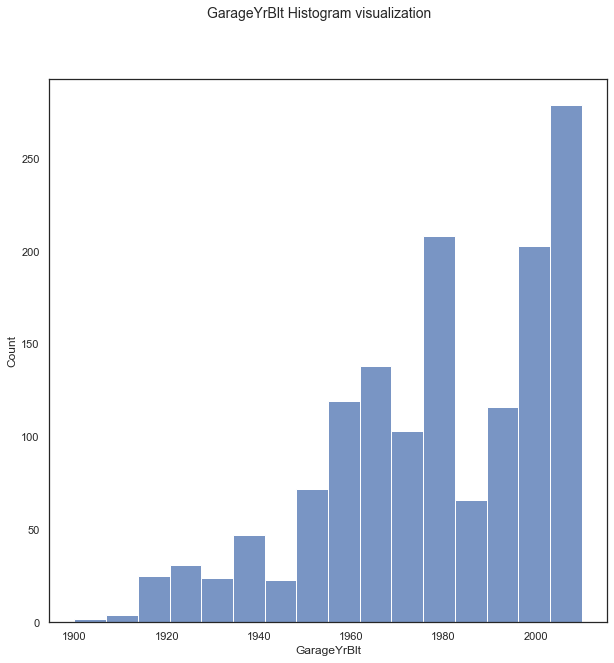

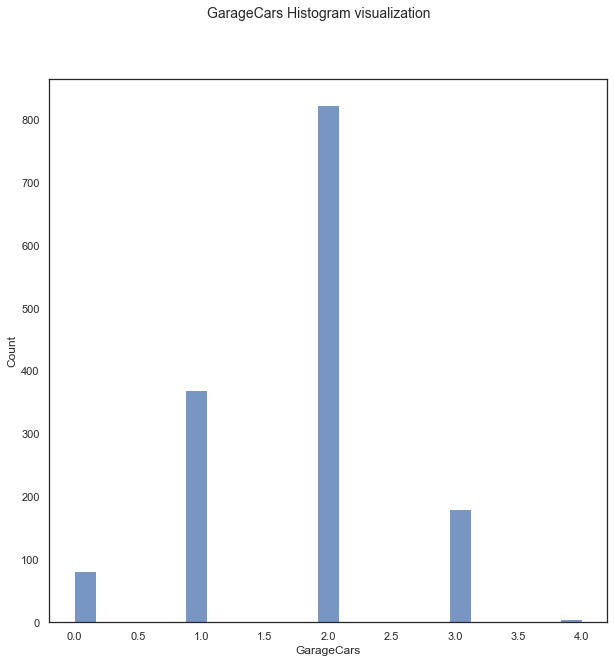

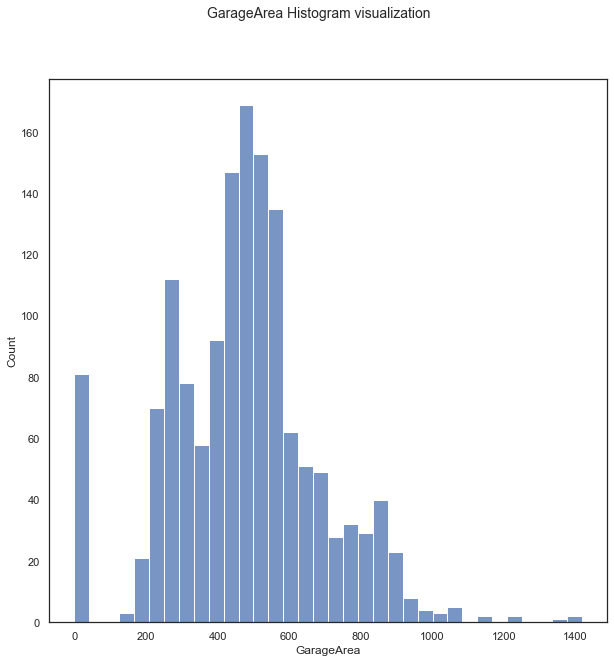

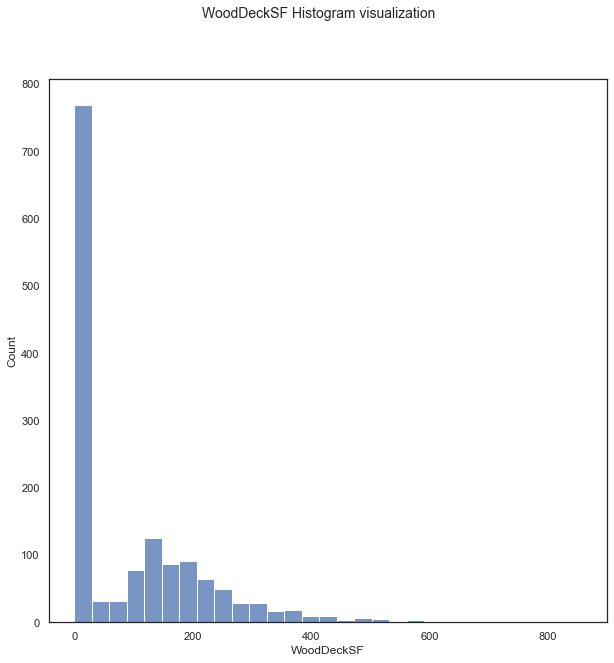

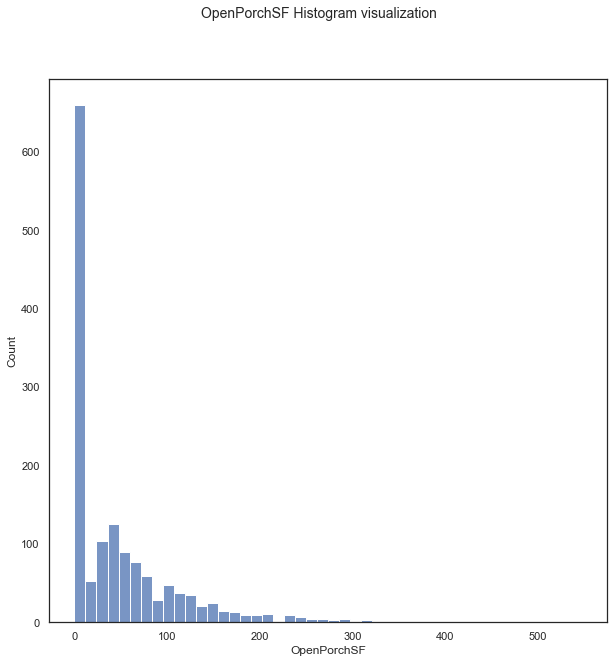

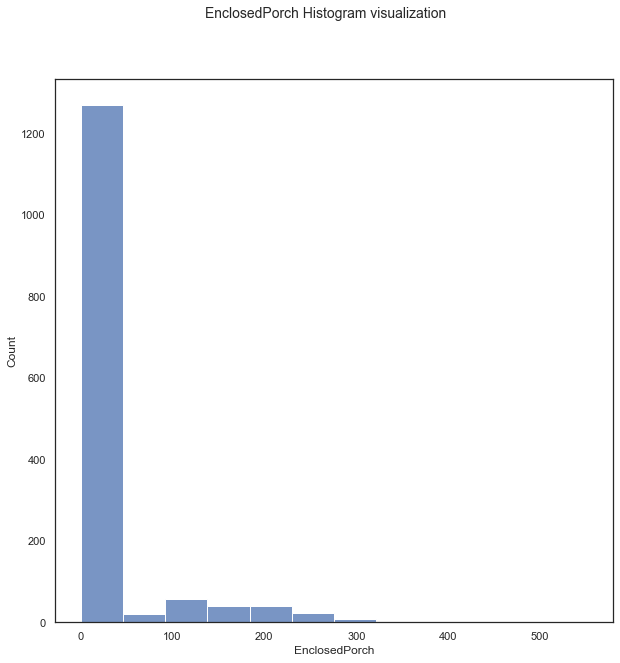

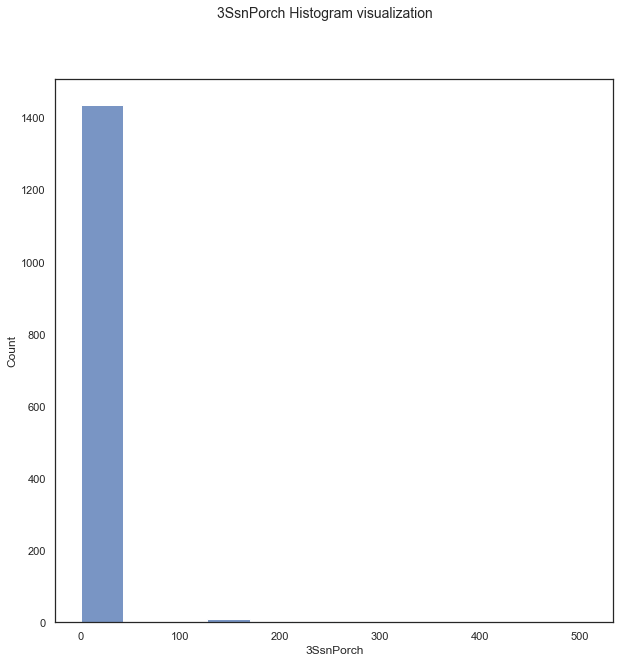

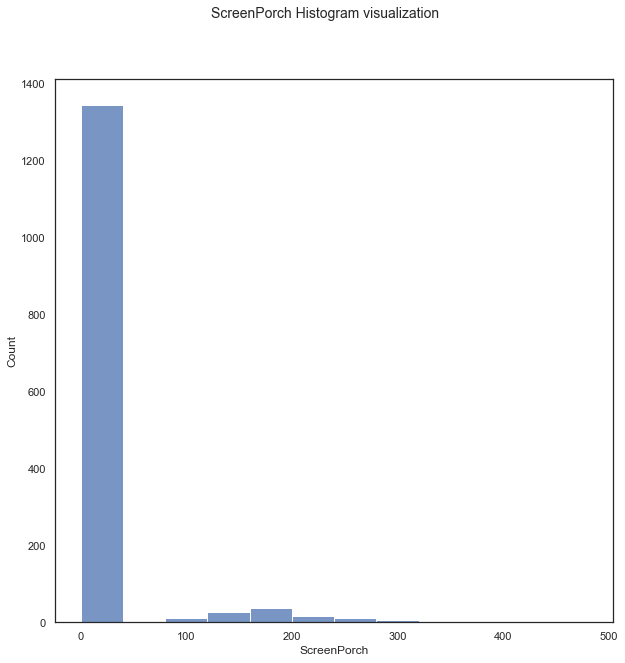

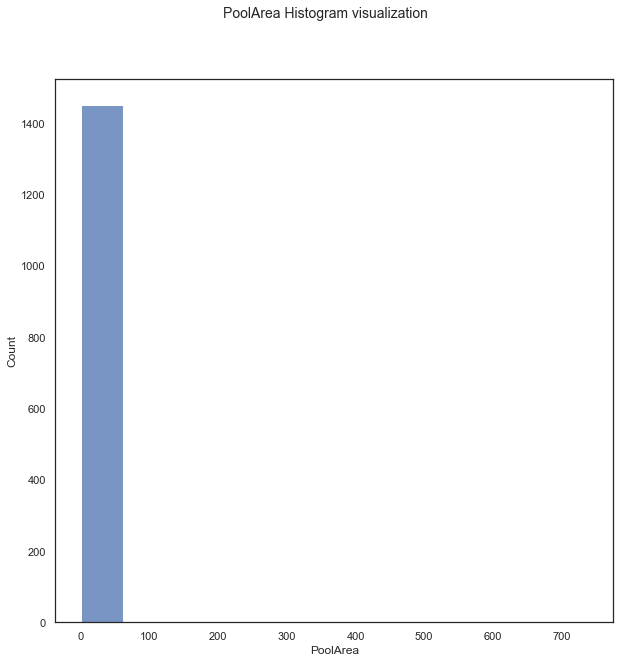

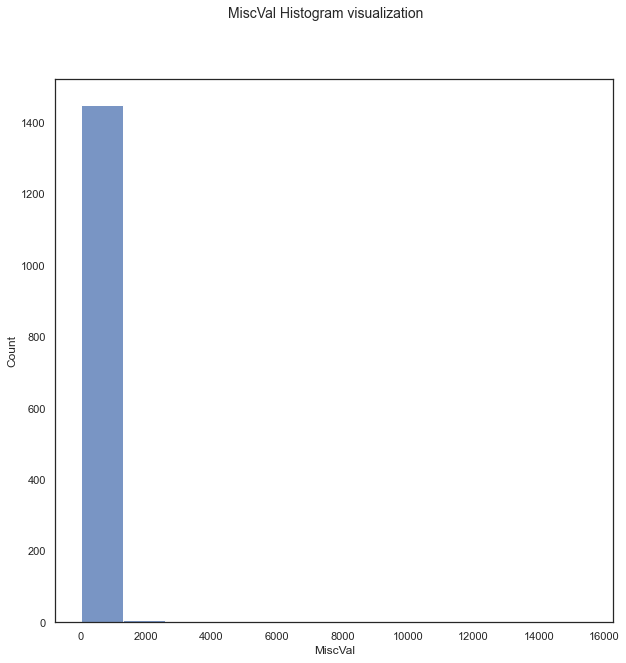

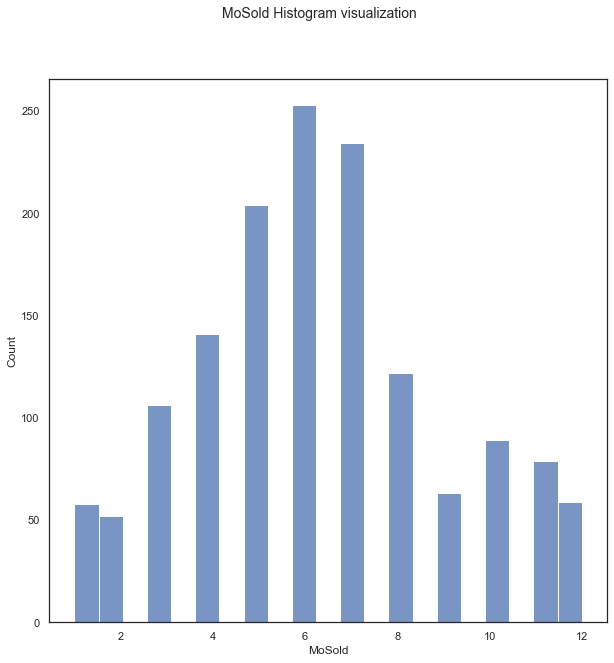

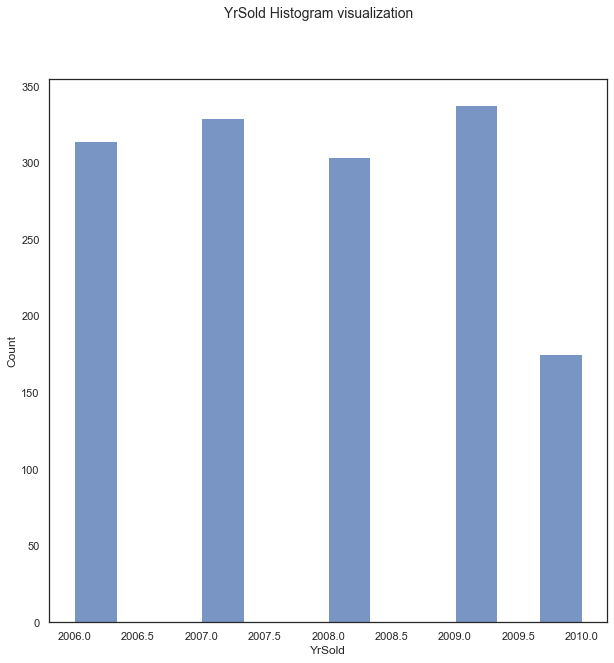

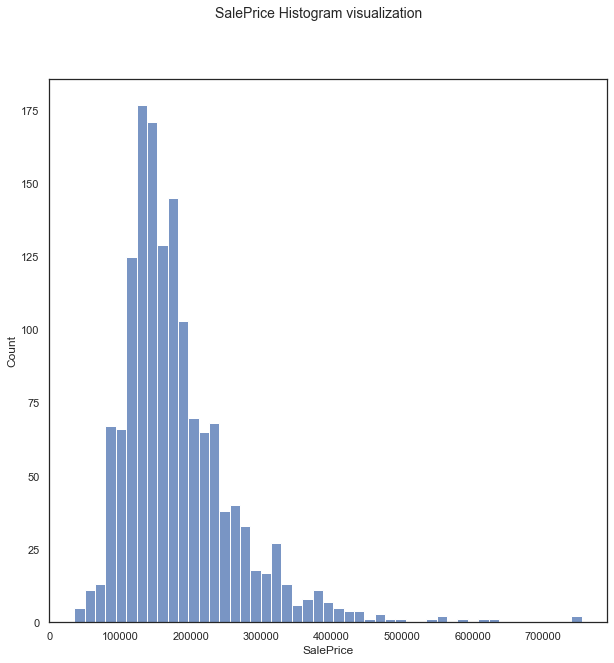

In [213]:
for i in training_data:
    if(training_data[i].dtype == np.float64 or training_data[i].dtype == np.int64):
        category=histo_plots(training_data,i)

# Histogramn notes
- Now as we can visualize we can see each histogram of each column,
- in our training_data, I have displayed them one by one seperatly,
- so we can get a better overview of the data distruipution.
- As we can see in each figure there are multiple features that have outliers,
- features that are skewed.
- with all the histograms we have let's start writing what features we will,
- work on in Feature Engineering.

# Features Notes
- First most imporatnt note is that object values will all be one hot encoded.
- Reason for one hot encoding all Object values is that our model Pipeline,
- can take one hot encoding but not label encoder, and objects needs to be,
- transformed into numerics and the way to do that is one hot encoding.
- Id: feature will not be neccessary in our prediction model so it's going in drop section.
- Most features are left or right skewed so we need to log transform those features.
- Now let's list the features that have spikes in some values:
    - OpenPorchSF
    - BsmtFinSF1
    - LotFrontage
    - LotArea
    - MasVnrArea
    - BsmtFinSF2
    - TotalBsmtSF
    - 2ndFlrSF
    - GarageArea
    - WoodDeckSF
    - OpenPorchSF
    - EnclosedPorch
    - ScreenPorch
- The rest of the features are either discrete or categorial.
- As we mentioned before we will deal with categorial using one hot encoding.

# Removing outliers
- In this part of the notebook we will remove all outliers from,
  - continuous values to make sure all is good before starting with FE.
  

In [214]:
#First let's manually choose the columns we want to remove outliers from.
#We'll only choose continious values.
for i in training_data:
    print(i, training_data[i].nunique())

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 111
LotArea 1073
Street 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
MasVnrArea 328
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 637
BsmtFinType2 6
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
GarageType 6
GarageYrBlt 98
GarageFinish 3
GarageCars 5
GarageArea 441
GarageQual 5
GarageCond 5
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
MiscVal 21
MoSold 12
YrSold 5
SaleType 9
SaleCondition 6
S

- Now some values might appear as continuous like YearBuilt.
- But they are actually discrete, so we'll ignore those.


In [215]:
for column in training_data[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1',
                             'BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                            '2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF',
                            'OpenPorchSF',
                            'SalePrice']]:
    for x in [column]:
        q75,q25 = np.percentile(training_data.loc[:,x],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        training_data.loc[training_data[x] < min,x] = np.nan
        training_data.loc[training_data[x] > max,x] = np.nan

- What usually would be done here is that we will drop empty rows from the dataset,
- because that's what percentile technique do it makes outliers Null values.
- But instead since we don't have much data I decided to fill those null values,
- By mean.
- This step helps us get rid of outliers and keep as much data as possible.

In [216]:
training_data=fill_null_values(training_data)

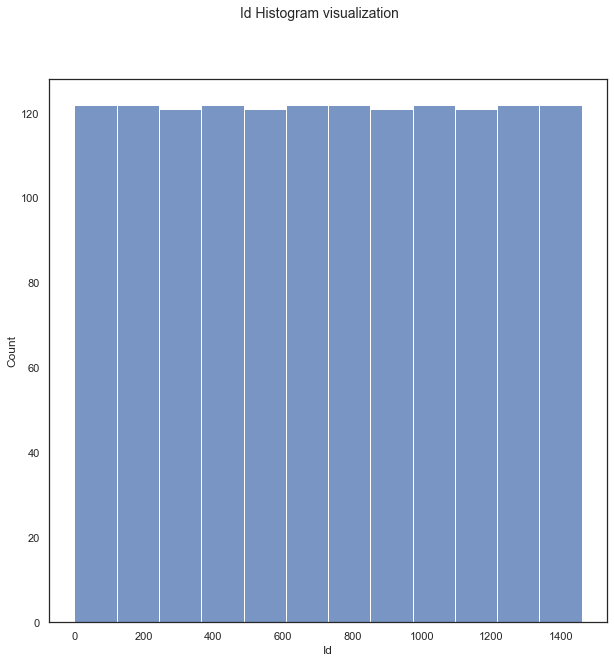

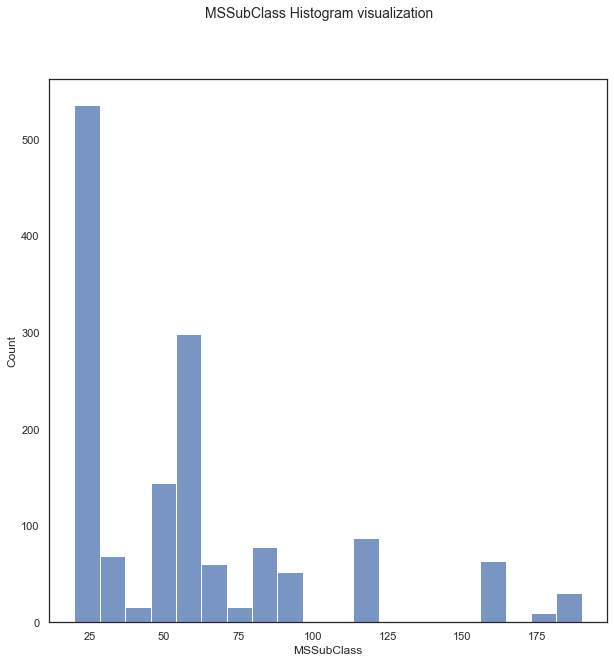

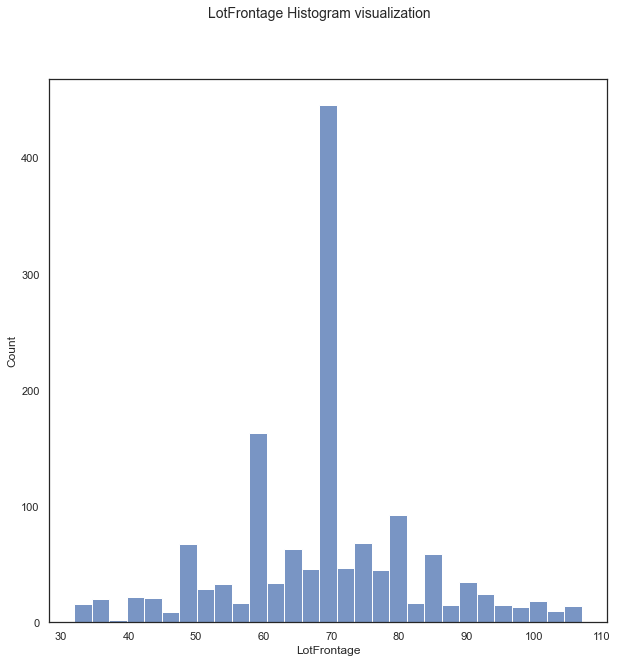

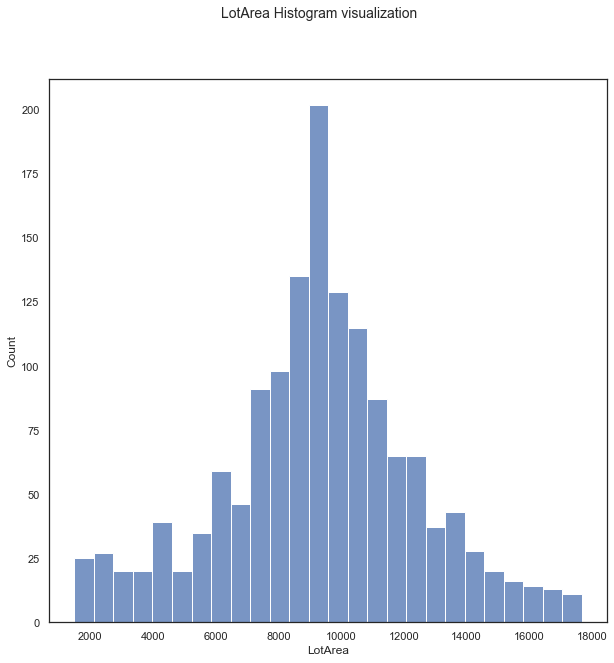

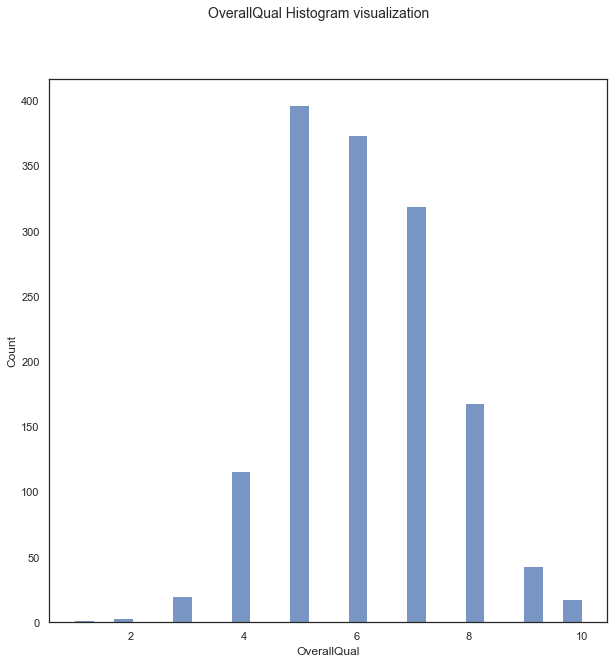

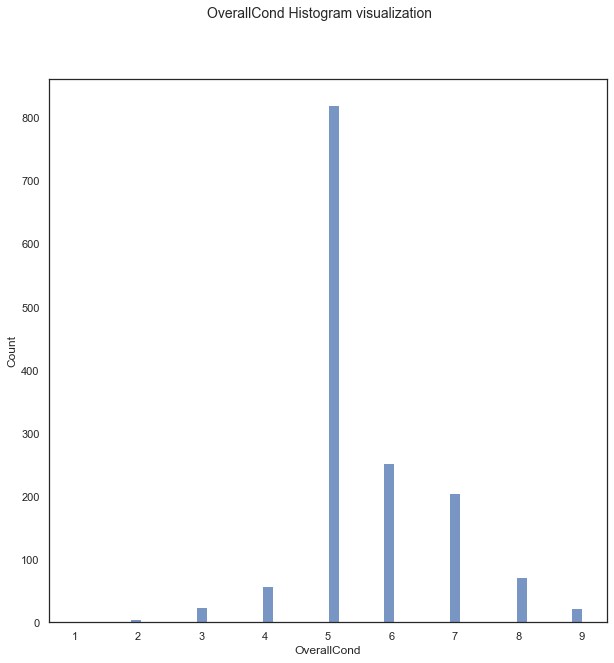

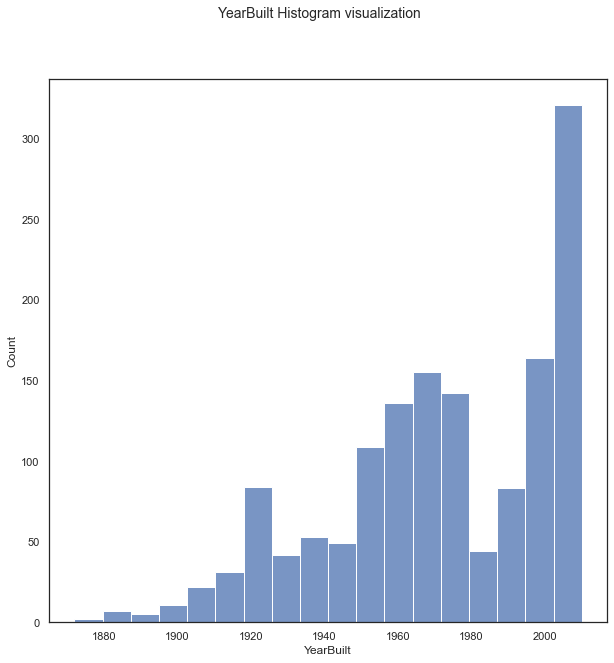

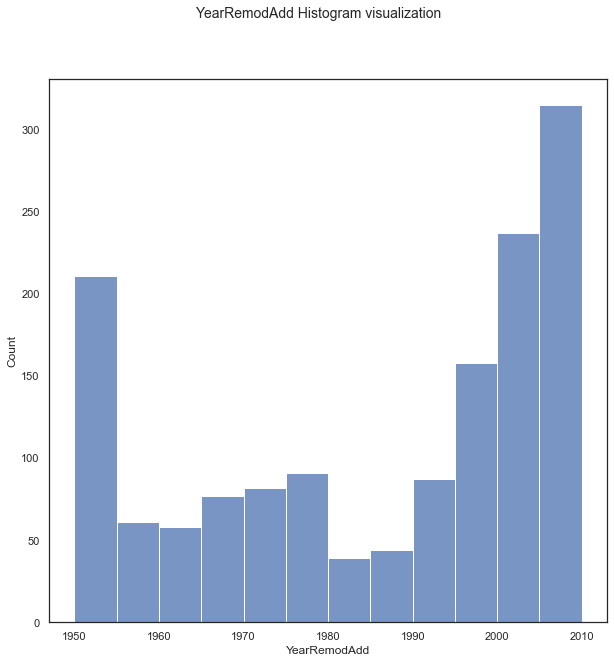

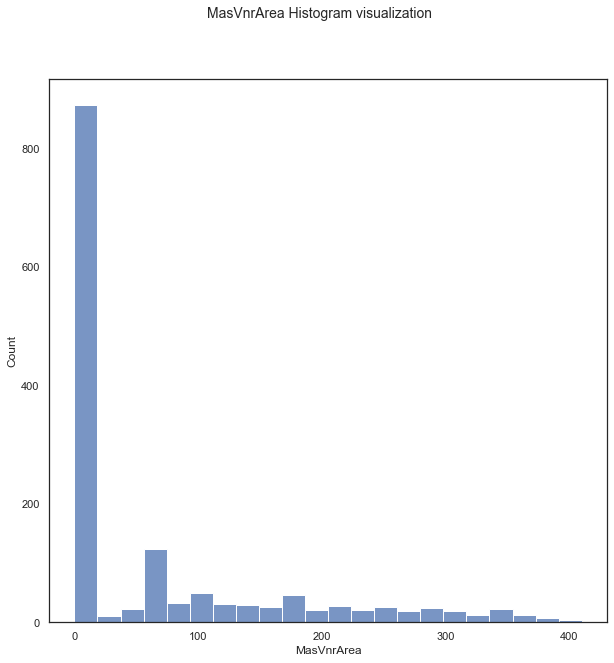

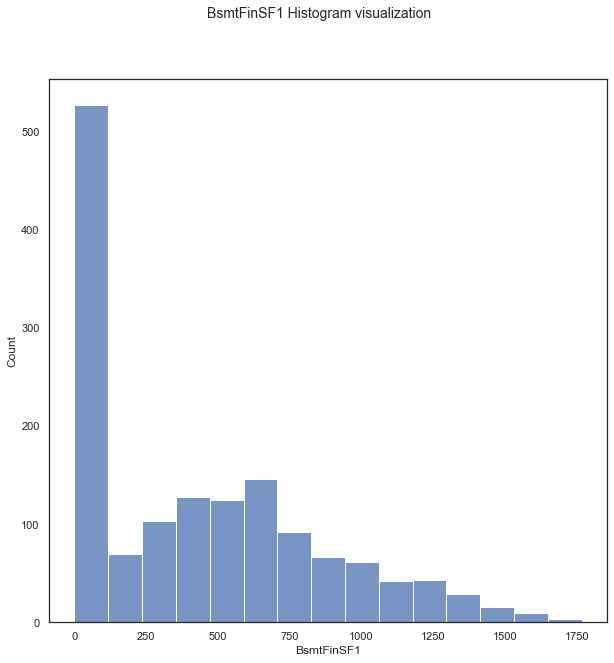

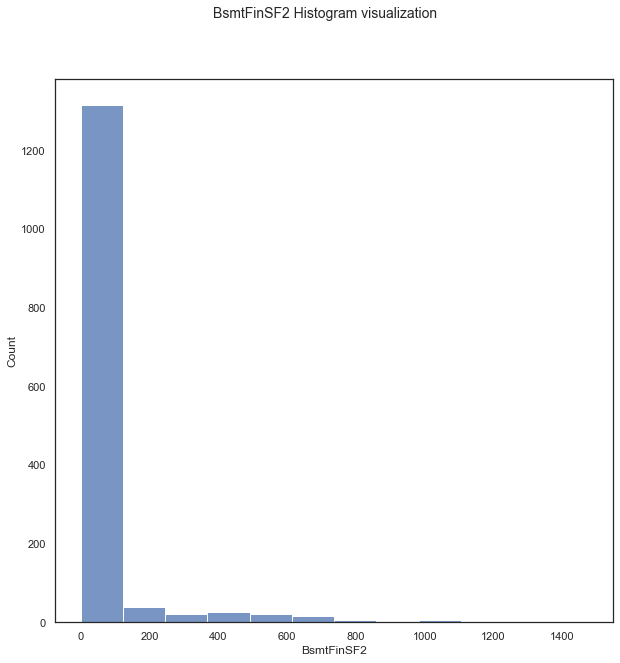

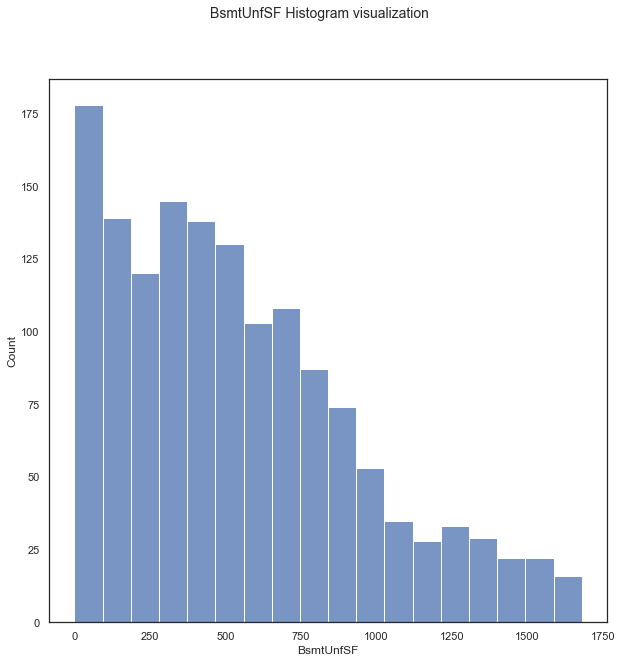

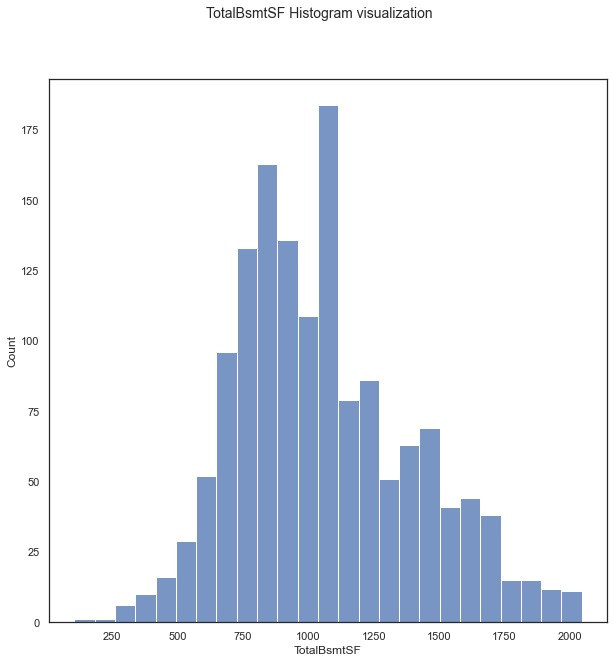

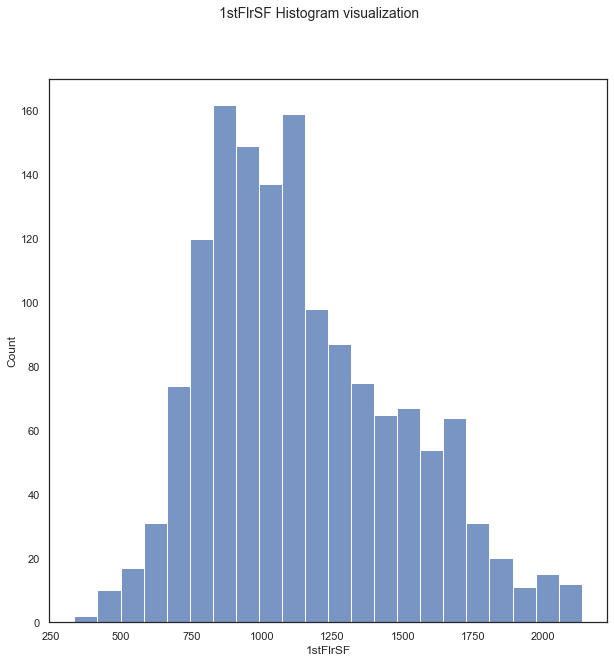

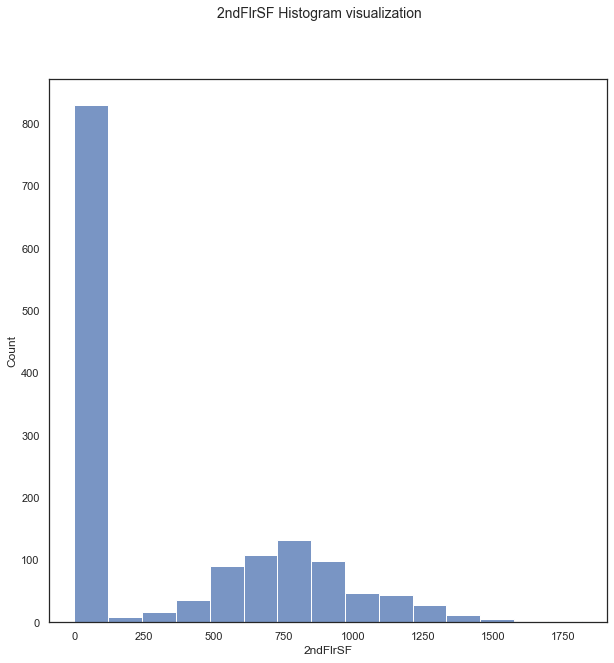

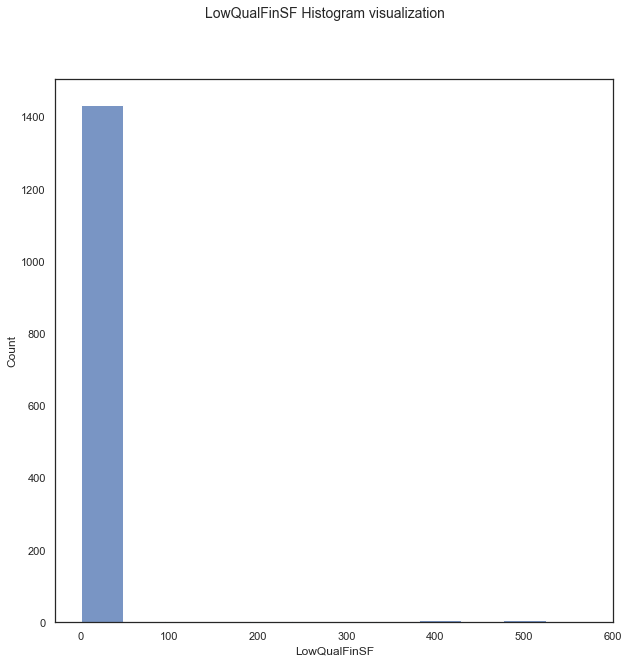

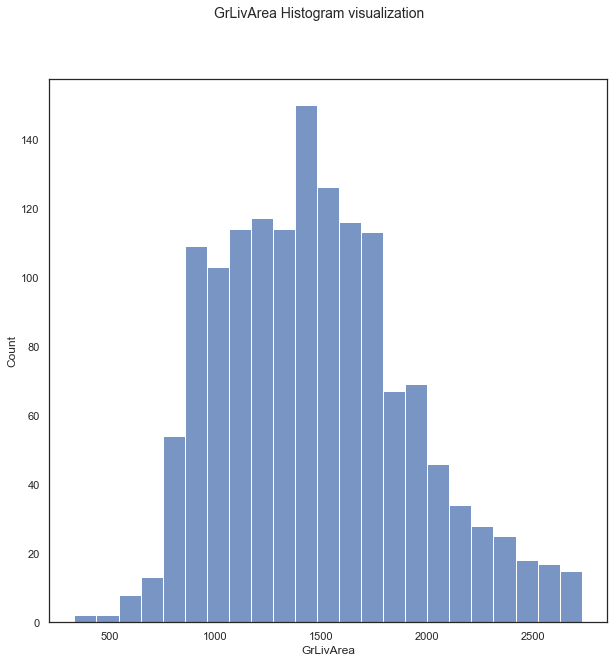

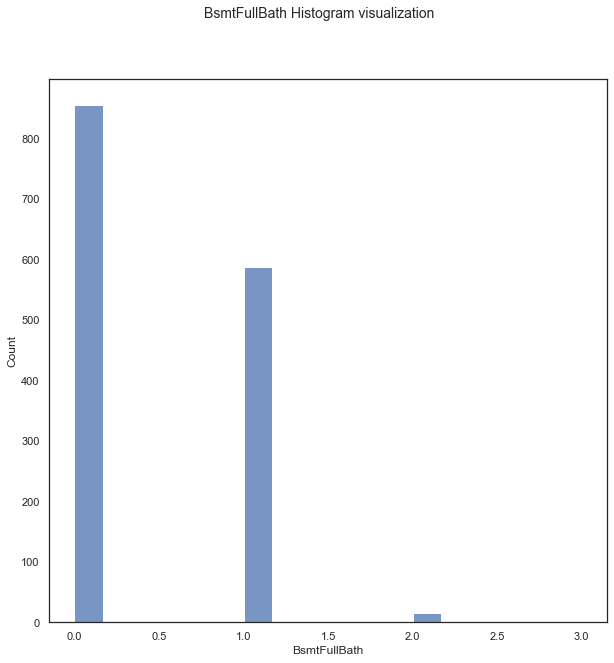

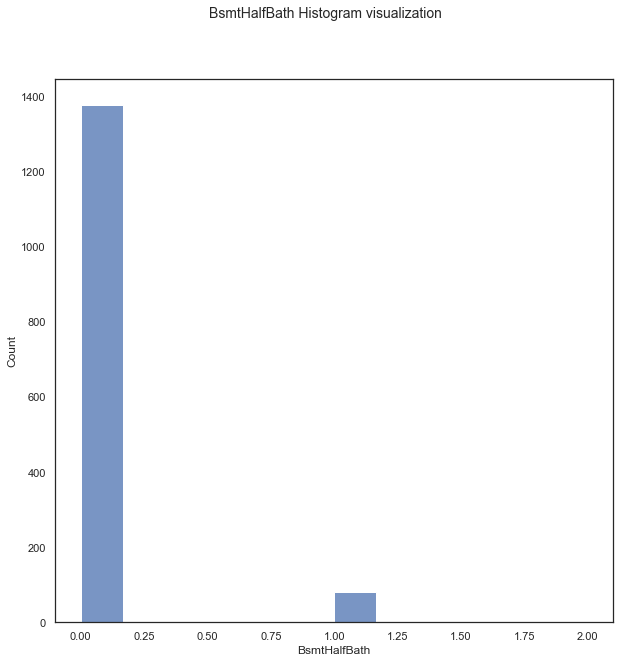

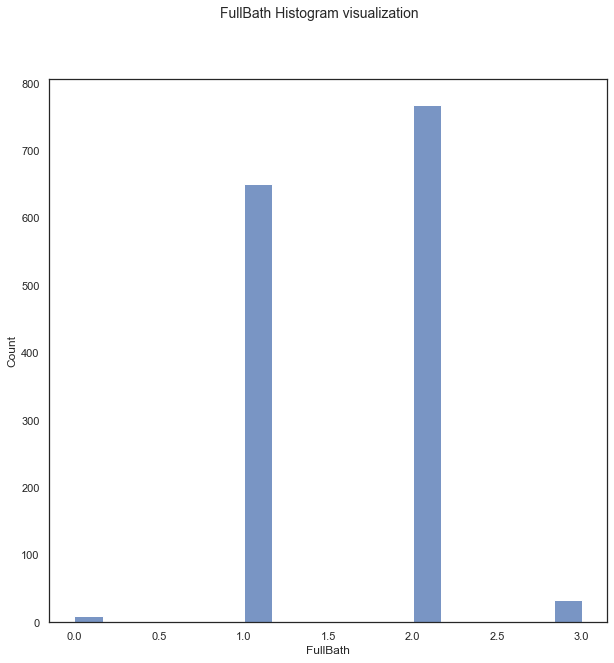

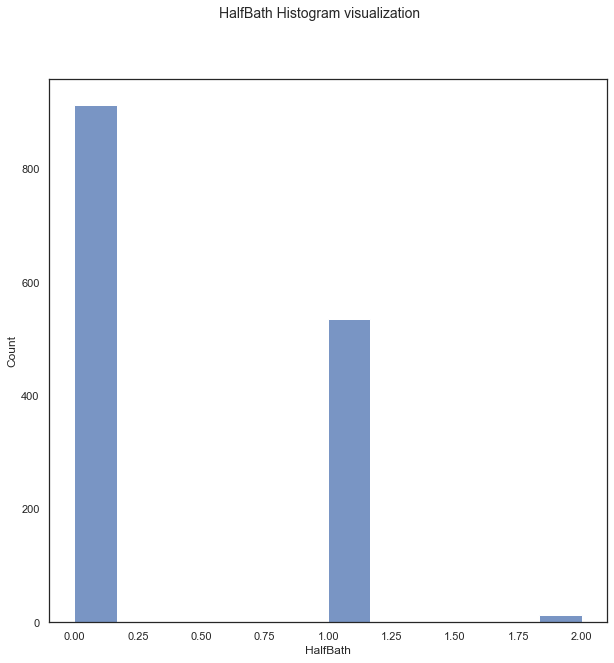

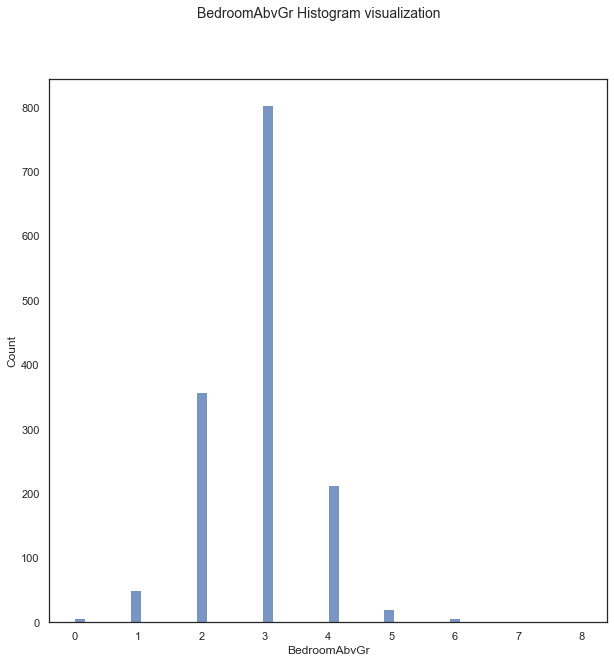

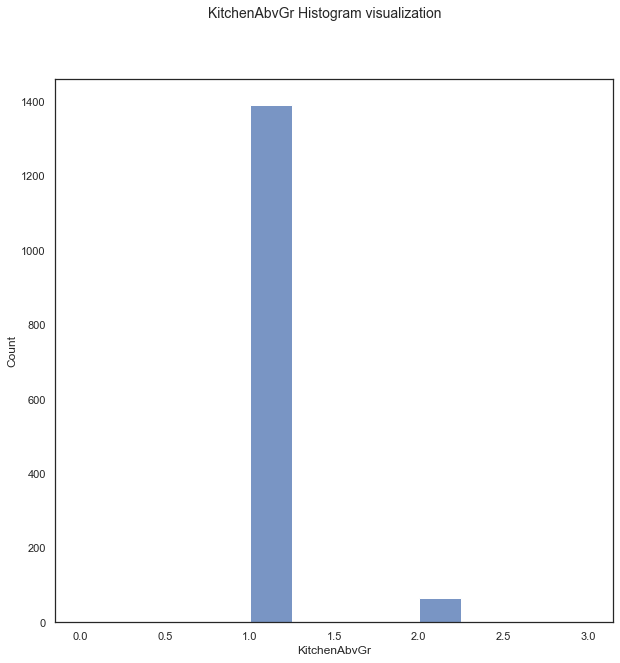

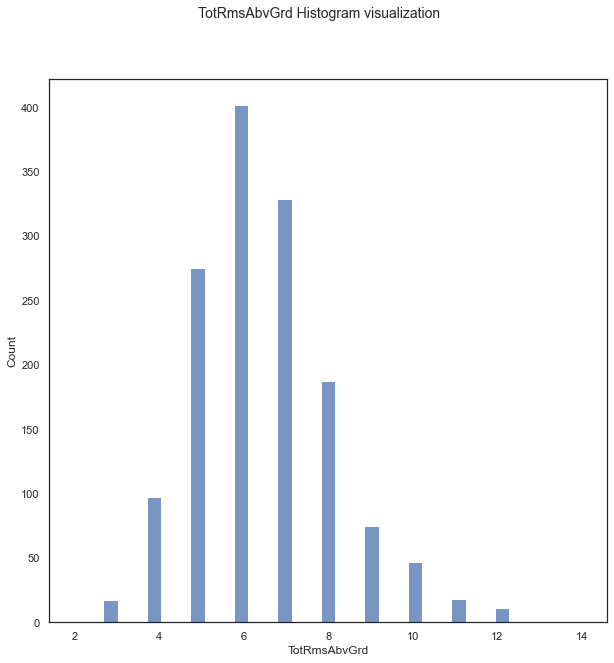

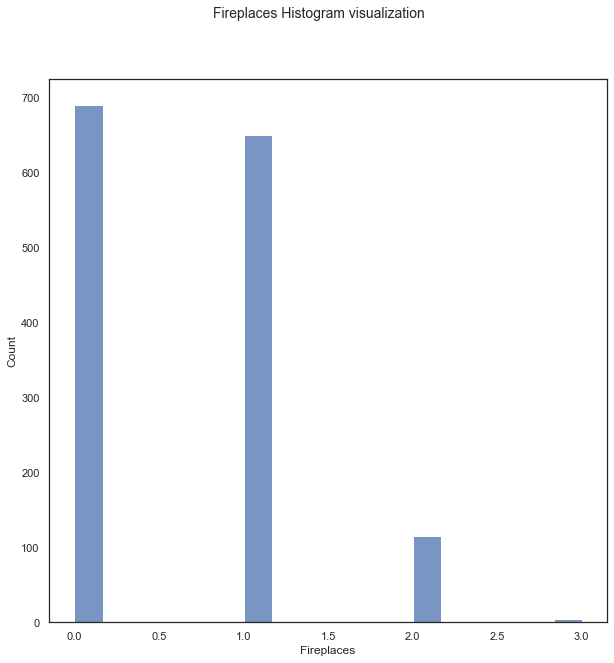

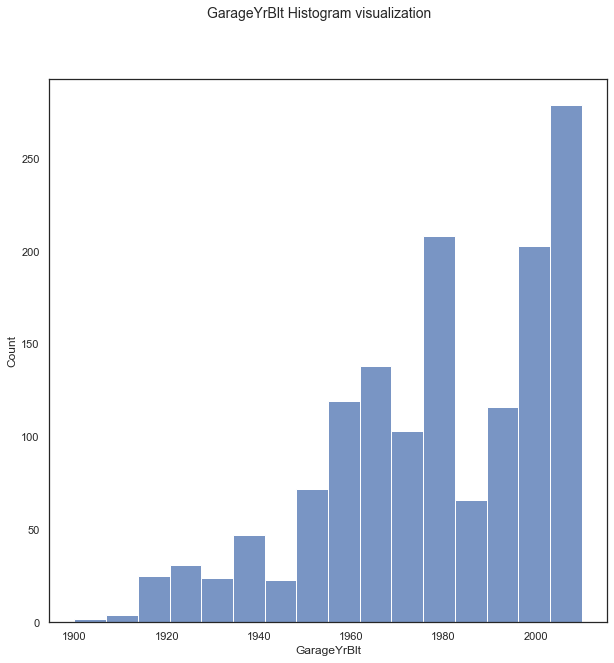

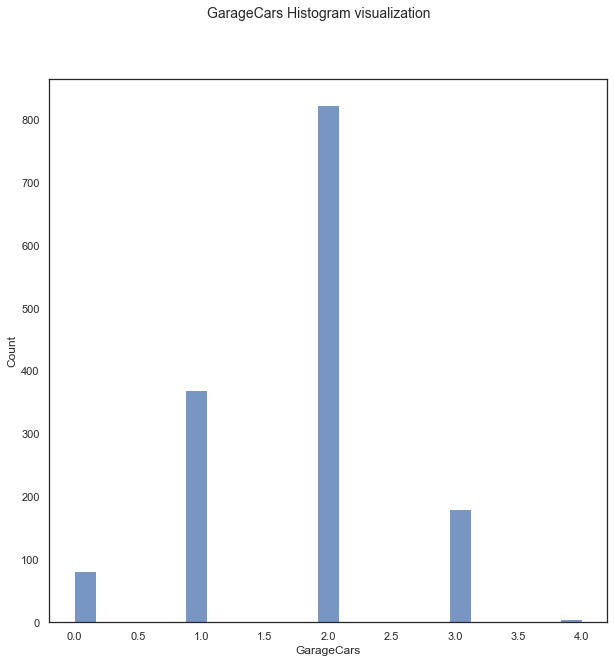

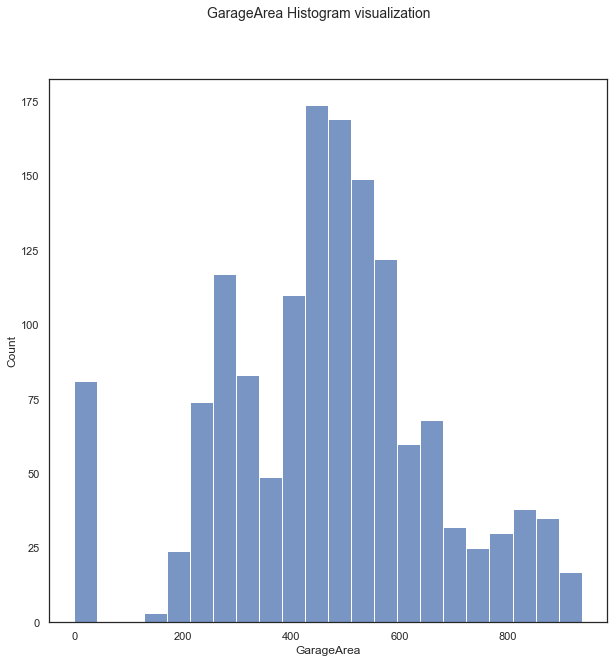

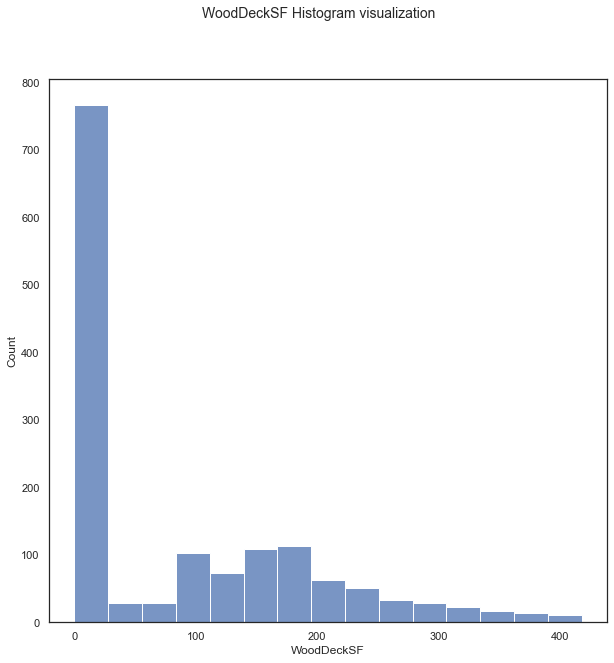

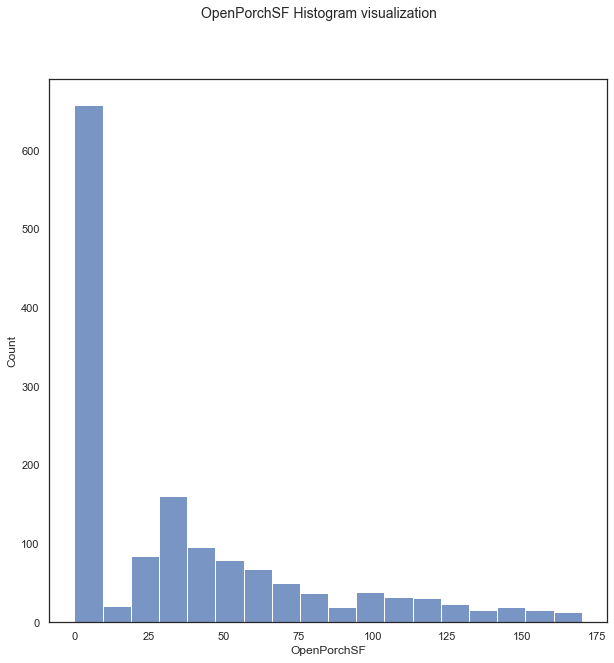

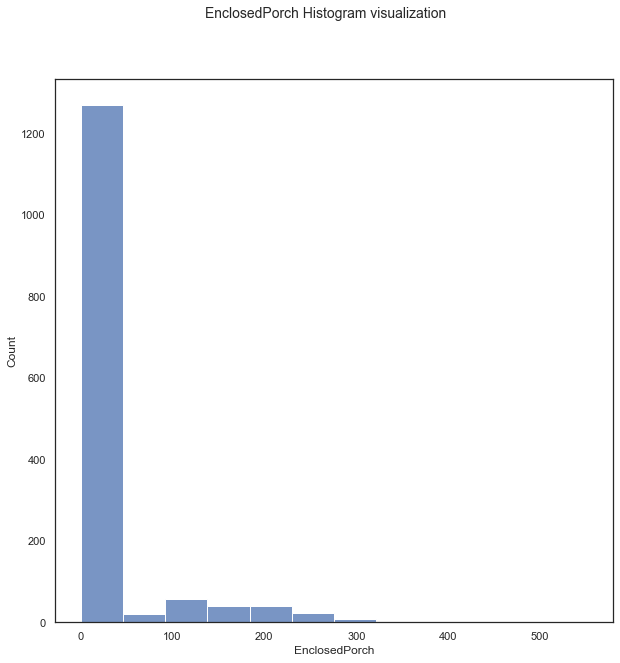

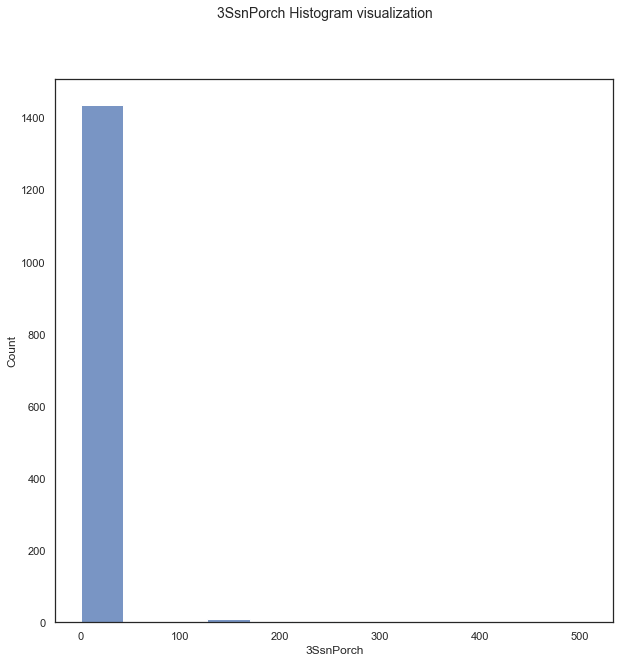

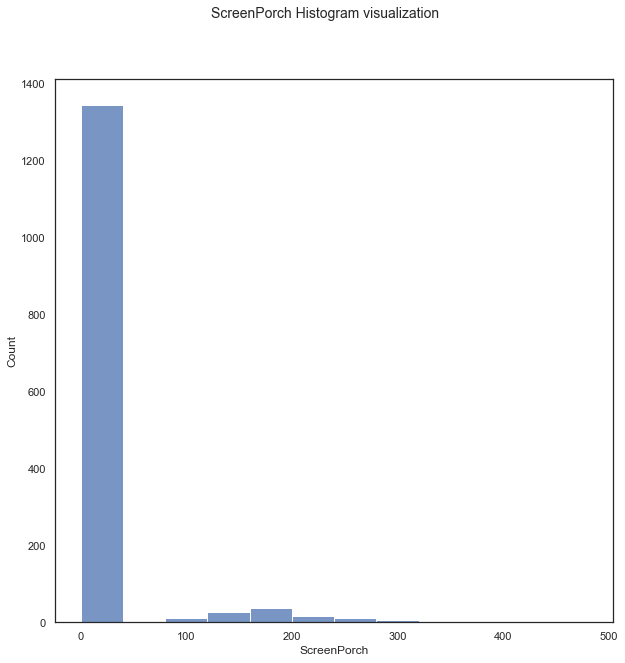

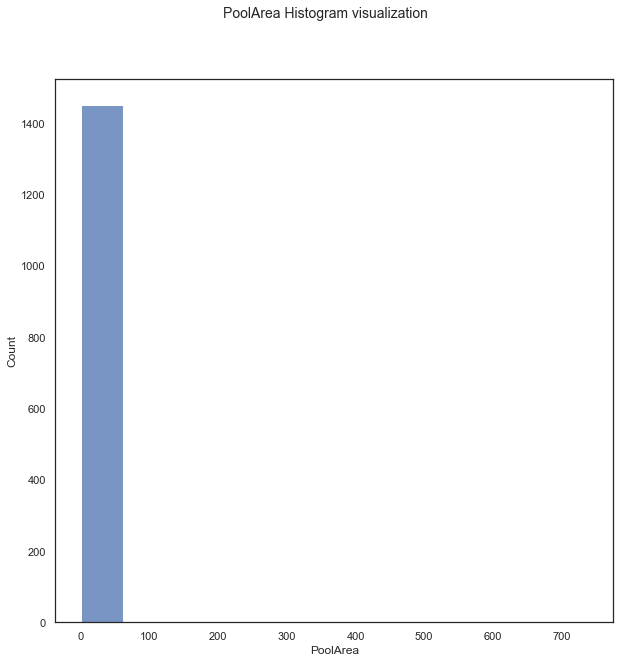

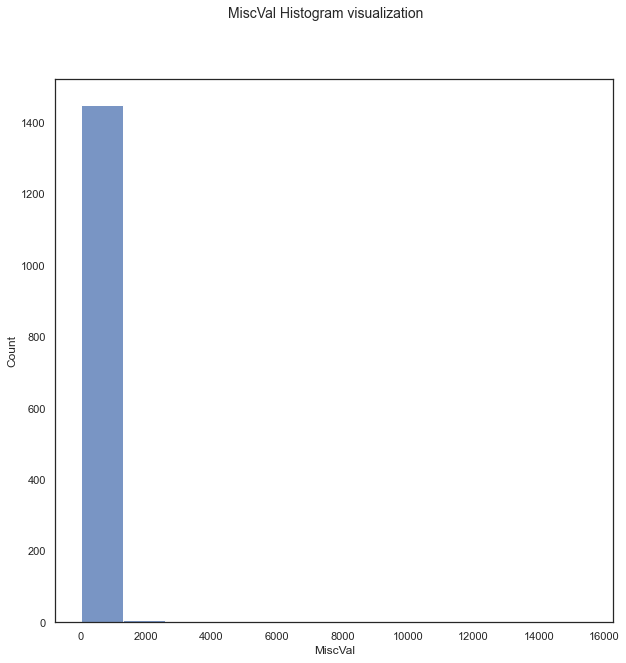

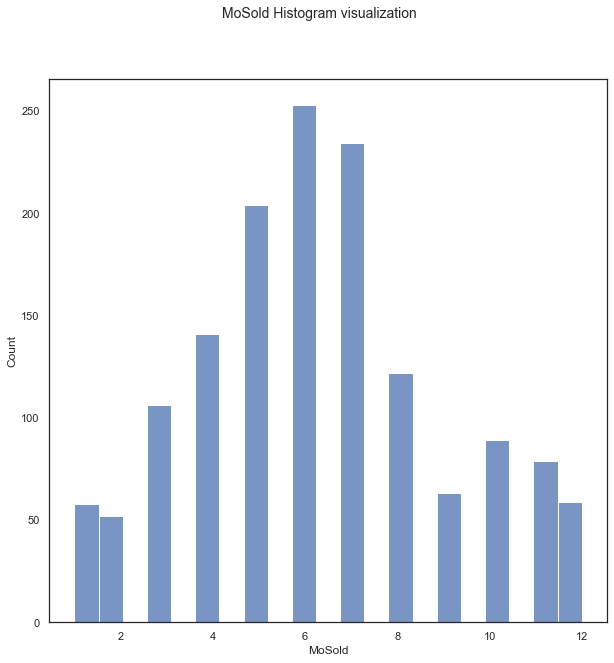

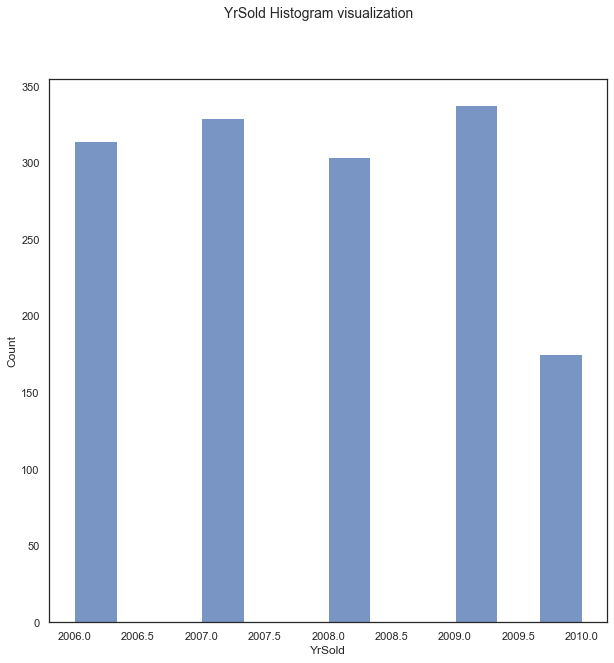

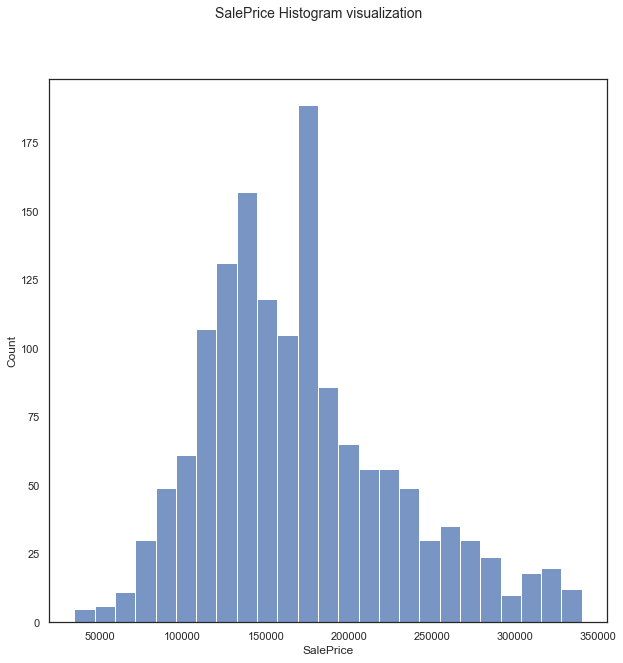

In [23]:
for i in training_data:
    if(training_data[i].dtype == np.float64 or training_data[i].dtype == np.int64):
        category=histo_plots(training_data,i)

In [24]:
training_data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.026371,-0.010700,-0.028365,0.012609,-0.012713,-0.021998,-0.023764,-0.009015,...,-0.047323,-0.019348,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.011764
MSSubClass,0.011156,1.000000,-0.235788,-0.433047,0.032628,-0.059316,0.027850,0.040581,0.012218,-0.067770,...,-0.034060,-0.026703,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.059541
LotFrontage,-0.026371,-0.235788,1.000000,0.439336,0.217560,-0.056481,0.171325,0.065273,0.231212,0.107488,...,0.101277,0.127844,-0.061948,0.073524,0.063198,0.020195,0.005792,0.020749,0.011658,0.276074
LotArea,-0.010700,-0.433047,0.439336,1.000000,0.234577,-0.020527,0.101182,0.074701,0.112632,0.173437,...,0.161422,0.143807,-0.023036,0.045209,0.093305,0.045309,0.037941,0.005935,-0.019012,0.370218
OverallQual,-0.028365,0.032628,0.217560,0.234577,1.000000,-0.091932,0.572323,0.550684,0.312052,0.201450,...,0.257808,0.378939,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.711810
OverallCond,0.012609,-0.059316,-0.056481,-0.020527,-0.091932,1.000000,-0.375983,0.073741,-0.122678,-0.039590,...,-0.007542,-0.082889,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.047221
YearBuilt,-0.012713,0.027850,0.171325,0.101182,0.572323,-0.375983,1.000000,0.592855,0.311584,0.245690,...,0.264461,0.309800,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.549091
YearRemodAdd,-0.021998,0.040581,0.065273,0.074701,0.550684,0.073741,0.592855,1.000000,0.143415,0.119114,...,0.251316,0.306556,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.530131
MasVnrArea,-0.023764,0.012218,0.231212,0.112632,0.312052,-0.122678,0.311584,0.143415,1.000000,0.190745,...,0.137666,0.136855,-0.101141,0.035051,0.029440,-0.012931,-0.038247,0.046954,0.001932,0.318688
BsmtFinSF1,-0.009015,-0.067770,0.107488,0.173437,0.201450,-0.039590,0.245690,0.119114,0.190745,1.000000,...,0.197557,0.070415,-0.101701,0.031292,0.073311,0.015046,0.005944,-0.002257,0.015469,0.285571


- as we can see from the correlation matrix nothing is highly correlated.
- thus for now we don't need to drop any highly correlated features.
- Now features to drop are simply:
    - Id column

In [217]:
training_data.drop(['Id'],axis=1,inplace=True)

# Feature Engineering
- In this part of the notebook we will start feature engineering process.
- The notes we wrote before about the columns we will now adjust here.

In [218]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import scipy.stats as spstats
from sklearn.compose import make_column_transformer

# One Hot encoding all object data

- Though it might not seem as much one hot encoding is only fitting the original dataset,
- we'll do one hot encoding using pandas.dummies 

In [219]:
training_data_copy=training_data.copy()

In [220]:

column_transformer = make_column_transformer(
    (OneHotEncoder(), training_data.select_dtypes(include='object').columns)
)

transformer_data = column_transformer.fit_transform(training_data)
encoded_column_names = column_transformer.transformers_[0][1].get_feature_names()

training_data[encoded_column_names] = transformer_data.toarray()
training_data[encoded_column_names]


,x0_C (all),x0_FV,x0_RH,x0_RL,x0_RM,x1_Grvl,x1_Pave,x2_IR1,x2_IR2,x2_IR3,x2_Reg,x3_Bnk,x3_HLS,x3_Low,x3_Lvl,x4_AllPub,x4_NoSeWa,x5_Corner,x5_CulDSac,x5_FR2,x5_FR3,x5_Inside,x6_Gtl,x6_Mod,x6_Sev,x7_Blmngtn,x7_Blueste,x7_BrDale,x7_BrkSide,x7_ClearCr,x7_CollgCr,x7_Crawfor,x7_Edwards,x7_Gilbert,x7_IDOTRR,x7_MeadowV,x7_Mitchel,x7_NAmes,x7_NPkVill,x7_NWAmes,x7_NoRidge,x7_NridgHt,x7_OldTown,x7_SWISU,x7_Sawyer,x7_SawyerW,x7_Somerst,x7_StoneBr,x7_Timber,x7_Veenker,x8_Artery,x8_Feedr,x8_Norm,x8_PosA,x8_PosN,x8_RRAe,x8_RRAn,x8_RRNe,x8_RRNn,x9_Artery,x9_Feedr,x9_Norm,x9_PosA,x9_PosN,x9_RRAe,x9_RRAn,x9_RRNn,x10_1Fam,x10_2fmCon,x10_Duplex,x10_Twnhs,x10_TwnhsE,x11_1.5Fin,x11_1.5Unf,x11_1Story,x11_2.5Fin,x11_2.5Unf,x11_2Story,x11_SFoyer,x11_SLvl,x12_Flat,x12_Gable,x12_Gambrel,x12_Hip,x12_Mansard,x12_Shed,x13_ClyTile,x13_CompShg,x13_Membran,x13_Metal,x13_Roll,x13_Tar&Grv,x13_WdShake,x13_WdShngl,x14_AsbShng,x14_AsphShn,x14_BrkComm,x14_BrkFace,x14_CBlock,x14_CemntBd,x14_HdBoard,x14_ImStucc,x14_MetalSd,x14_Plywood,x14_Stone,x14_Stucco,x14_VinylSd,x14_Wd Sdng,x14_WdShing,x15_AsbShng,x15_AsphShn,x15_Brk Cmn,x15_BrkFace,x15_CBlock,x15_CmentBd,x15_HdBoard,x15_ImStucc,x15_MetalSd,x15_Other,x15_Plywood,x15_Stone,x15_Stucco,x15_VinylSd,x15_Wd Sdng,x15_Wd Shng,x16_BrkCmn,x16_BrkFace,x16_None,x16_Stone,x17_Ex,x17_Fa,x17_Gd,x17_TA,x18_Ex,x18_Fa,x18_Gd,x18_Po,x18_TA,x19_BrkTil,x19_CBlock,x19_PConc,x19_Slab,x19_Stone,x19_Wood,x20_Ex,x20_Fa,x20_Gd,x20_TA,x21_Fa,x21_Gd,x21_Po,x21_TA,x22_Av,x22_Gd,x22_Mn,x22_No,x23_ALQ,x23_BLQ,x23_GLQ,x23_LwQ,x23_Rec,x23_Unf,x24_ALQ,x24_BLQ,x24_GLQ,x24_LwQ,x24_Rec,x24_Unf,x25_Floor,x25_GasA,x25_GasW,x25_Grav,x25_OthW,x25_Wall,x26_Ex,x26_Fa,x26_Gd,x26_Po,x26_TA,x27_N,x27_Y,x28_FuseA,x28_FuseF,x28_FuseP,x28_Mix,x28_SBrkr,x29_Ex,x29_Fa,x29_Gd,x29_TA,x30_Maj1,x30_Maj2,x30_Min1,x30_Min2,x30_Mod,x30_Sev,x30_Typ,x31_2Types,x31_Attchd,x31_Basment,x31_BuiltIn,x31_CarPort,x31_Detchd,x32_Fin,x32_RFn,x32_Unf,x33_Ex,x33_Fa,x33_Gd,x33_Po,x33_TA,x34_Ex,x34_Fa,x34_Gd,x34_Po,x34_TA,x35_N,x35_P,x35_Y,x36_COD,x36_CWD,x36_Con,x36_ConLD,x36_ConLI,x36_ConLw,x36_New,x36_Oth,x36_WD,x37_Abnorml,x37_AdjLand,x37_Alloca,x37_Family,x37_Normal,x37_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [104]:
training_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,7,5,2003,2003,196.0,706.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600.0,6,8,1976,1976,0.0,978.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250.0,7,5,2001,2002,162.0,486.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550.0,7,5,1915,1970,0.0,216.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260.0,8,5,2000,2000,350.0,655.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917.0,6,5,1999,2000,0.0,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,20,85.0,13175.0,6,6,1978,1988,119.0,790.0,163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,70,66.0,9042.0,7,9,1941,2006,0.0,275.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,20,68.0,9717.0,5,6,1950,1996,0.0,49.0,1029,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Cross Validation and Model selection

- First step that we will do is splitting the data into training and testing

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from pprint import pprint
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [34]:
x_train, x_test, y_train, y_test = \
    train_test_split(training_data.drop(columns=['SalePrice']),
                     training_data['SalePrice'],
                     test_size=0.2,
                     random_state=42)

In [35]:
gbt = GradientBoostingRegressor(random_state = 42)
pprint(gbt.get_params())

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [36]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
max_depth = [int(x) for x in np.linspace(5, 74, num = 10)]
max_depth.append(None)
min_samples_split = [5, 10, 16]
min_samples_leaf = [2, 4, 7]
learning_rate = [0.01, 0.1]

random_grid_search = {
                'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}
pprint(random_grid_search)

{'learning_rate': [0.01, 0.1],
 'max_depth': [5, 12, 20, 28, 35, 43, 51, 58, 66, 74, None],
 'min_samples_leaf': [2, 4, 7],
 'min_samples_split': [5, 10, 16],
 'n_estimators': [100, 200, 300, 400, 500]}


In [37]:
gbt_random = RandomizedSearchCV(estimator = gbt,
                               param_distributions = random_grid_search,
                               n_iter = 10, 
                               cv = 5,
                               verbose=2,
                               random_state=42,
                               n_jobs = 1)
gbt_random

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [5, 12, 20, 28, 35, 43, 51,
                                                      58, 66, 74, None],
                                        'min_samples_leaf': [2, 4, 7],
                                        'min_samples_split': [5, 10, 16],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [38]:
gbt_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.01, max_depth=35, min_samples_leaf=7, min_samples_split=5, n_estimators=400; total time=   8.7s
[CV] END learning_rate=0.01, max_depth=35, min_samples_leaf=7, min_samples_split=5, n_estimators=400; total time=   8.9s
[CV] END learning_rate=0.01, max_depth=35, min_samples_leaf=7, min_samples_split=5, n_estimators=400; total time=   8.9s
[CV] END learning_rate=0.01, max_depth=35, min_samples_leaf=7, min_samples_split=5, n_estimators=400; total time=   8.8s
[CV] END learning_rate=0.01, max_depth=35, min_samples_leaf=7, min_samples_split=5, n_estimators=400; total time=   8.3s
[CV] END learning_rate=0.01, max_depth=58, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   4.1s
[CV] END learning_rate=0.01, max_depth=58, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   4.3s
[CV] END learning_rate=0.01, max_depth=58, min_samples_leaf=4, min_samples_split=5, n_estima

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [5, 12, 20, 28, 35, 43, 51,
                                                      58, 66, 74, None],
                                        'min_samples_leaf': [2, 4, 7],
                                        'min_samples_split': [5, 10, 16],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [39]:
gbt_random.best_estimator_


GradientBoostingRegressor(max_depth=5, min_samples_leaf=7, min_samples_split=16,
                          random_state=42)

In [40]:
gbt_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 16,
 'min_samples_leaf': 7,
 'max_depth': 5,
 'learning_rate': 0.1}

In [41]:
gbt_random.best_score_

0.7490625849779313

In [42]:
best_gbt_model = gbt_random.best_estimator_
best_gbt_model

GradientBoostingRegressor(max_depth=5, min_samples_leaf=7, min_samples_split=16,
                          random_state=42)

In [43]:
# there are default values for the hyper parameters for the RF model
rf = RandomForestRegressor(random_state = 42)
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [44]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [45]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(
                            estimator = rf,
                            param_distributions = random_grid,
                            n_iter = 10,
                            cv = 5,
                            verbose=2,
                            random_state=42,
                            n_jobs = -1)
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [46]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [47]:
best_rf_model = rf_random.best_estimator_
best_rf_model

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=1400)

In [48]:
rf_random.best_score_

0.7529645023283873

In [49]:
knn = KNeighborsRegressor()
knn.get_params()
array=[]
parameters = {"n_neighbors": range(1,100) }

knn_R = RandomizedSearchCV(KNeighborsRegressor(), parameters,cv = 5, n_iter = 100)
knn_R.fit(x_train, y_train)
knn_best = knn_R.best_params_
knn_best_score = knn_R.best_score_
knn_best_score

0.5522377963468497

In [50]:
best_knn_model=knn_R.best_estimator_
best_knn_model

KNeighborsRegressor(n_neighbors=9)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn import linear_model

In [52]:
parmeters={"alpha":[0.01,0.1,0.2,0.3]}

reg_pipeline_lasso = make_pipeline(PolynomialFeatures(degree=1),RandomizedSearchCV(linear_model.Lasso(),parmeters,cv=5,n_iter=10))

reg_pipeline_lasso.fit(x_train,y_train)
print("Lasso Degree 1: ",reg_pipeline_lasso[('randomizedsearchcv')].best_score_)



reg_pipeline_ridge = make_pipeline(PolynomialFeatures(degree=1),RandomizedSearchCV(linear_model.Ridge(),parmeters,cv=5,n_iter=10))

reg_pipeline_ridge.fit(x_train,y_train)
print("Ridge Degree 1: ",reg_pipeline_ridge[('randomizedsearchcv')].best_score_)



reg_pipeline_lasso2 = make_pipeline(PolynomialFeatures(degree=2),RandomizedSearchCV(linear_model.Lasso(),parmeters,cv=5,n_iter=10))

reg_pipeline_lasso2.fit(x_train,y_train)
print("Lasso Degree 2: ",reg_pipeline_lasso2[('randomizedsearchcv')].best_score_)



reg_pipeline_ridge2 = make_pipeline(PolynomialFeatures(degree=2),RandomizedSearchCV(linear_model.Ridge(),parmeters,cv=5,n_iter=10))

reg_pipeline_ridge2.fit(x_train,y_train)
print("Ridge Degree 2: ",reg_pipeline_ridge2[('randomizedsearchcv')].best_score_)





Lasso Degree 1:  0.678453085738987
Ridge Degree 1:  0.688675876274976
Lasso Degree 2:  0.4139258206669121
Ridge Degree 2:  -8.482494148766


In [53]:
reg_lasso_best=reg_pipeline_lasso[('randomizedsearchcv')].best_estimator_
reg_ridge_best=reg_pipeline_ridge[('randomizedsearchcv')].best_estimator_

In [54]:
print("Random Forest mean: ",cross_val_score(best_rf_model, x_test, y_test, cv=5).mean())
print("Gradiant Boosting mean: ",cross_val_score(best_gbt_model, x_test, y_test, cv=5).mean())
print("Knn mean: ",cross_val_score(best_knn_model, x_test, y_test, cv=5).mean())

Random Forest mean:  0.7150950389622694
Gradiant Boosting mean:  0.740388193186621
Knn mean:  0.43819964854018495


# Model

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn2pmml import PMMLPipeline
from sklearn import utils


#I concluded the next equation form this



Input = [('scale', StandardScaler()), ('polynomial',PolynomialFeatures(degree=2),('mode',LinearRegression()))]


Pipe = Pipeline(Input)


Pipe.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y)

# Splitting the data and fitting into pipeline

In [221]:
training_data_copy.drop(['SalePrice'],axis=1,inplace=True)

In [222]:
y_train=pd.DataFrame(training_data['SalePrice'])
x_train=pd.DataFrame(training_data.drop(['SalePrice'],axis=1))

In [161]:
mapper = DataFrameMapper(
    [(d, LabelEncoder()) for d in x_train]
)


In [162]:
pipeline = PMMLPipeline([("mapper", mapper),
                   ("onehot", encoder),
                   ("GradientBoostingRegressor",GradientBoostingRegressor(max_depth=5, min_samples_leaf=7, min_samples_split=16,
                          random_state=42))])
pipeline

PMMLPipeline(steps=[('mapper', DataFrameMapper(drop_cols=[],
                features=[('MSSubClass', LabelEncoder()),
                          ('MSZoning', LabelEncoder()),
                          ('LotFrontage', LabelEncoder()),
                          ('LotArea', LabelEncoder()),
                          ('Street', LabelEncoder()),
                          ('LotShape', LabelEncoder()),
                          ('LandContour', LabelEncoder()),
                          ('Utilities', LabelEncoder()),
                          ('LotConfig', LabelEncoder()),
                          ('LandSlope', LabelEncoder()),
                          ('Neighborhood', LabelEn...
                          ('YearRemodAdd', LabelEncoder()),
                          ('RoofStyle', LabelEncoder()),
                          ('RoofMatl', LabelEncoder()),
                          ('Exterior1st', LabelEncoder()),
                          ('Exterior2nd', LabelEncoder()),
                          

In [223]:
pipe = make_pipeline(column_transformer,
                   GradientBoostingRegressor(max_depth=5, min_samples_leaf=7, min_samples_split=16,
                          random_state=42))
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Founda...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=5, min_samples_leaf=7,
                                           min_samples

In [226]:
pipe.fit(training_data_copy, y_train.astype('int'))


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Founda...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=5, min_samples_leaf=7,
                                           min_samples

# Saving the model using pickle method

In [ ]:

pickle.dump(pipeline, open('best_model.sav', 'wb'))




In [227]:
import pickle
pickle.dump(pipe,open('model_test.sav','wb'))